In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data
df = pd.read_excel('dataset.xls',parse_dates=True)
df.head(n=3)

Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16  Second Class    DV-13045   

     Customer Name    Segment        Country         City  ... Postal Code  \
0      Claire Gute   Consumer  United States    Henderson  ...       42420   
1      Claire Gute   Consumer  United States    Henderson  ...       42420   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   

   Region       Product ID         Category Sub-Category  \
0   South  FUR-BO-10001798        Furniture    Bookcases   
1   South  FUR-CH-10000454        Furniture       Chairs   
2    West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714  

[3 rows x 21 columns]

In [4]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
# print column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# What are the different categories of sales?
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [7]:
# Select only Furnitures
df = df[df["Category"] == "Furniture"].reset_index(drop=True)
df.head(n=3)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

    Customer Name   Segment        Country             City  ... Postal Code  \
0     Claire Gute  Consumer  United States        Henderson  ...       42420   
1     Claire Gute  Consumer  United States        Henderson  ...       42420   
2  Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   

   Region       Product ID   Category Sub-Category  \
0   South  FUR-BO-10001798  Furniture    Bookcases   
1   South  FUR-CH-10000454  Furniture       Chairs   
2   South  FUR-TA-10000577  Furniture       Tables   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.45 -383.0310  

[3 rows x 21 columns]

In [8]:
# Shape of the new filtered data
df.shape

(2121, 21)

In [9]:
# Check if there's null in the dataset
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Exploratory Data Analysis

### 1. Univariate analysis

In [10]:
df.head(1)

Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ... Postal Code  Region  \
0   Claire Gute  Consumer  United States  Henderson  ...       42420   South   

        Product ID   Category Sub-Category                       Product Name  \
0  FUR-BO-10001798  Furniture    Bookcases  Bush Somerset Collection Bookcase   

    Sales  Quantity  Discount   Profit  
0  261.96         2       0.0  41.9136  

[1 rows x 21 columns]

In [11]:
df.dtypes.Segment

dtype('O')

In [12]:
# print categorical variables
print([i for i in df.columns if df.dtypes[i] == "O"])


['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


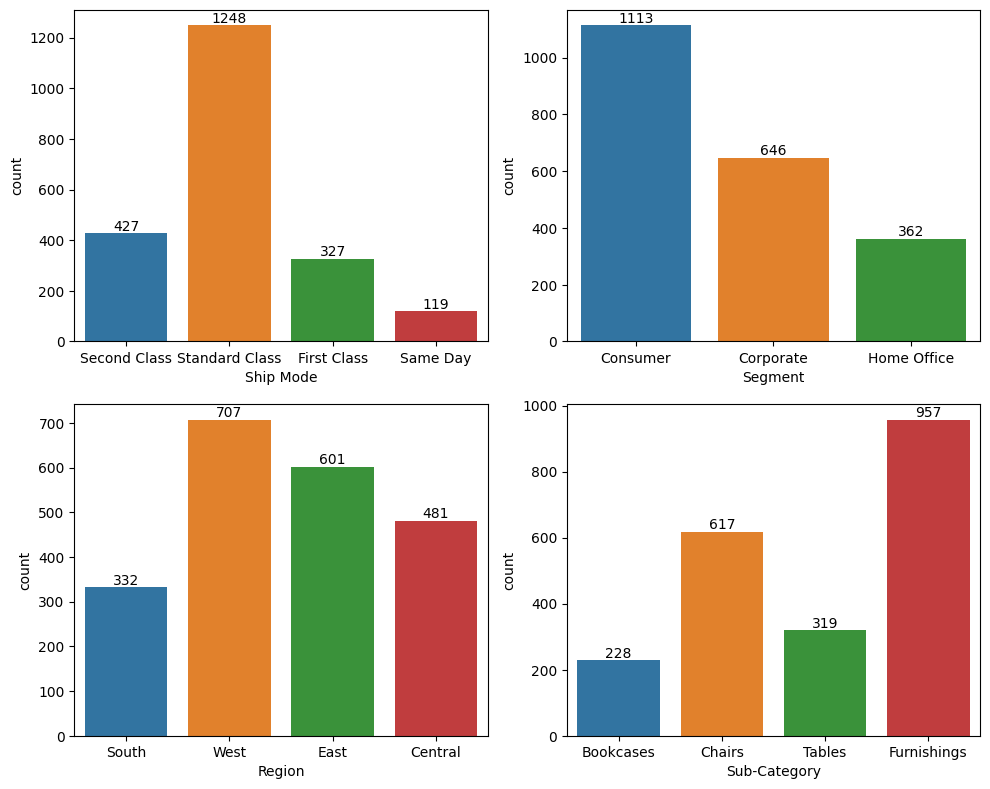

In [13]:
# Among all categorical variables, plot distribution of 'Ship Mode', 'Segment', 'Region', 'Sub-category'
plt.subplots(2, 2, figsize=(10,8))

plt.subplot(221)
ax1 = sns.countplot("Ship Mode", data=df)
for j in ax1.containers:
    ax1.bar_label(j)

plt.subplot(222)
ax2 = sns.countplot("Segment", data=df)
for j in ax2.containers:
    ax2.bar_label(j)

plt.subplot(223)
ax3 = sns.countplot("Region", data=df)
for j in ax3.containers:
    ax3.bar_label(j)

plt.subplot(224)
ax4 = sns.countplot("Sub-Category", data=df)
for j in ax4.containers:
    ax4.bar_label(j)


plt.tight_layout()
plt.show()

## Interpretation:-
        * The mostly used Ship mode is 'Standard Class' followed by 'Second class'.
        * The highest segment the sales of furniture belongs to 'Consumer Segment'.
        * The most products of furniture are sold in the 'West region'.
        * The subcategory 'Furnishings' are mostly sold followed by 'Chairs'.

In [14]:
# Some statistics of Sales
df[["Sales"]].describe()

Sales
count  2121.000000
mean    349.834887
std     503.179145
min       1.892000
25%      47.040000
50%     182.220000
75%     435.168000
max    4416.174000

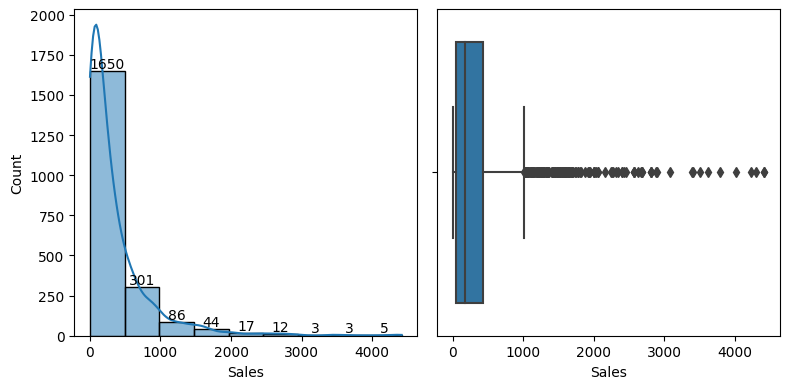

In [15]:
# plot distribution of sales

plt.subplots(1, 2, figsize=(8,4))

plt.subplot(121)
nbins = np.linspace(df["Sales"].min(), df["Sales"].max(), 10)
ax1 = sns.histplot(df["Sales"], bins=nbins, kde=True)
for j in ax1.containers:
    ax1.bar_label(j)

plt.subplot(122)
ax2 = sns.boxplot("Sales", data=df)
    
plt.tight_layout()
plt.show()

## Interpretation:-
         * The Sales are not distributed normally from the box plot we can see their are more outliers.
         * The mean is greater than median data is right skewed and the data is mostly towards the left.  

In [16]:
# Some statistics of profit
df[["Profit"]].describe()

Profit
count  2121.000000
mean      8.699327
std     136.049246
min   -1862.312400
25%     -12.849000
50%       7.774800
75%      33.726600
max    1013.127000

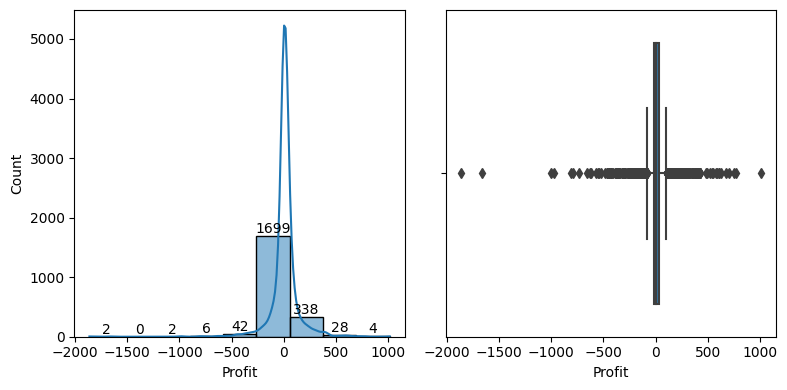

In [17]:
# plot distribution of Profit

plt.subplots(1, 2, figsize=(8,4))

plt.subplot(121)
nbins = np.linspace(df["Profit"].min(), df["Profit"].max(), 10)
ax1 = sns.histplot(df["Profit"], bins=nbins, kde=True)
for j in ax1.containers:
    ax1.bar_label(j)

plt.subplot(122)
ax2 = sns.boxplot("Profit", data=df)
    
plt.tight_layout()
plt.show()

## Interpretation:-
         * The profits are not distributed normally from the box plot we can see their are more outliers.
         * The mean is less than median data is left skewed and the data is mostly towards the right.  

## 2.BIVARIATE ANALYSIS

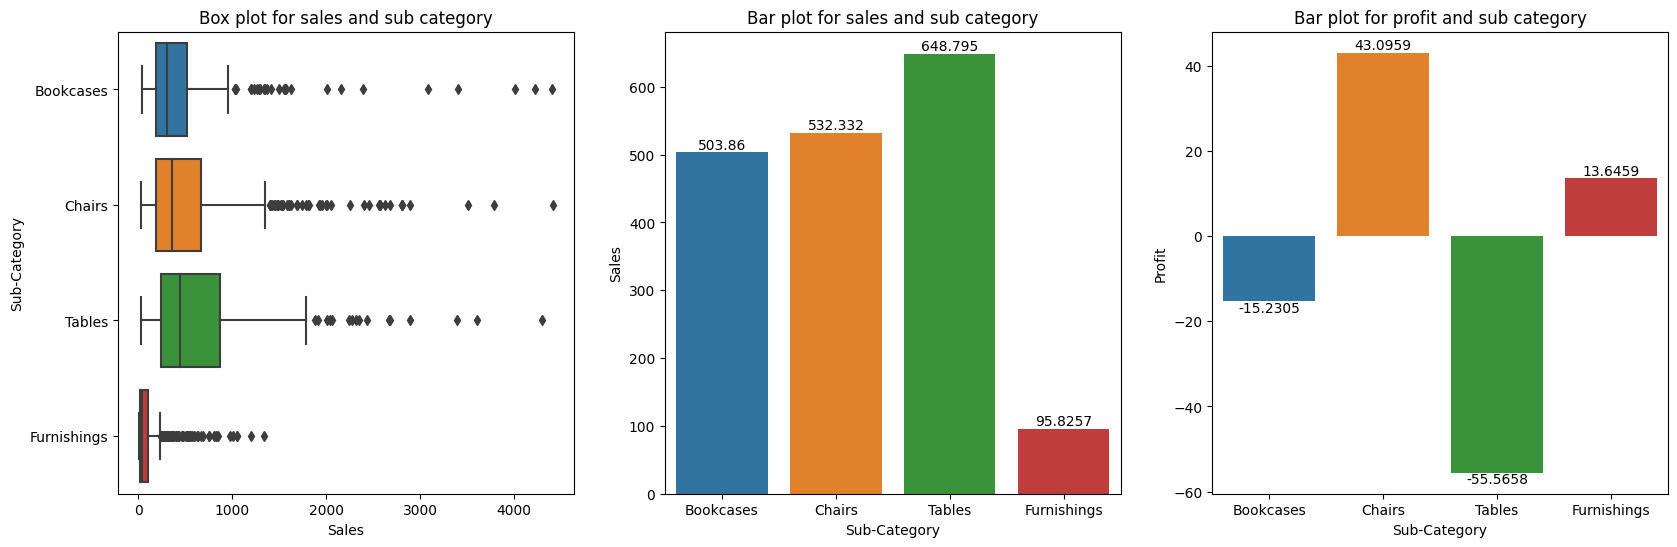

In [18]:
#Plot for the features sales and Sub-category
plt.subplots(1,3,figsize=(20,6))

plt.subplot(131)
sns.boxplot(data=df, x='Sales', y='Sub-Category')
plt.title('Box plot for sales and sub category')

plt.subplot(132)
ax=sns.barplot(data=df, y='Sales', x='Sub-Category',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for sales and sub category')

plt.subplot(133)
ax=sns.barplot(data=df, y='Profit', x='Sub-Category',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for profit and sub category')
plt.show()

plt.show()

## Interpretation:- For sub-Category
        * The Sales of 'Tables' are highest compared to others but these products are not profitable they are in losses.
        * The Sales of 'Chairs' are second highest and the 'profits' are highest compared to other sub category products.
        * The Sales of 'Bookcases' are third highest but not profitable they are in losses.
        * The Sales of 'furnishings' are least but these sub category products are profitable.       

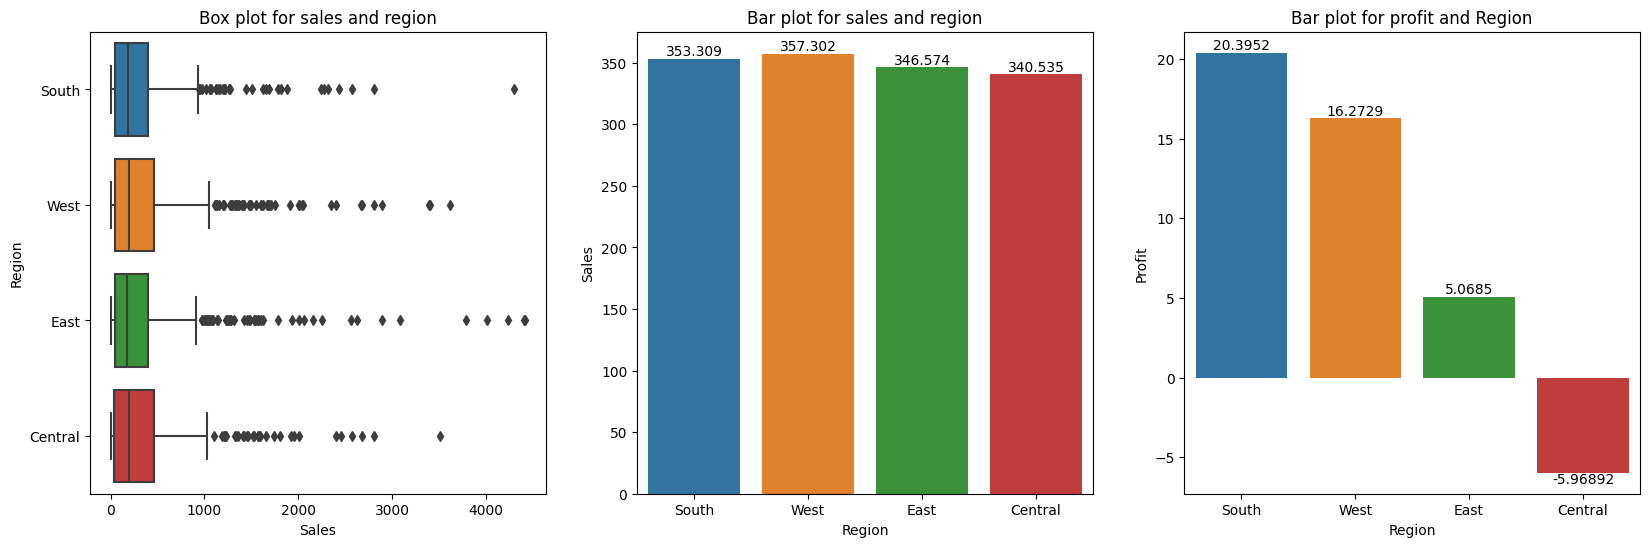

In [19]:
#Plot for the features sales and Region
plt.subplots(1,3,figsize=(20,6))

plt.subplot(131)
sns.boxplot(data=df, x='Sales', y='Region')
plt.title('Box plot for sales and region')

plt.subplot(132)
ax=sns.barplot(data=df, y='Sales', x='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for sales and region')

plt.subplot(133)
ax=sns.barplot(data=df, y='Profit', x='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for profit and Region')
plt.show()

## Interpretation:- For region
        * The Sales are Highest in the 'West Region' but the profits are less compared to 'South region'.
        * The Sales in 'South Region' are second highest and the 'profits' are highest compared to other regions.
        * The Sales in 'East Region' are third highest but profits are less than South and West regions.
        * The Sales in 'Central Region' are least and in these region products are not profitable.       

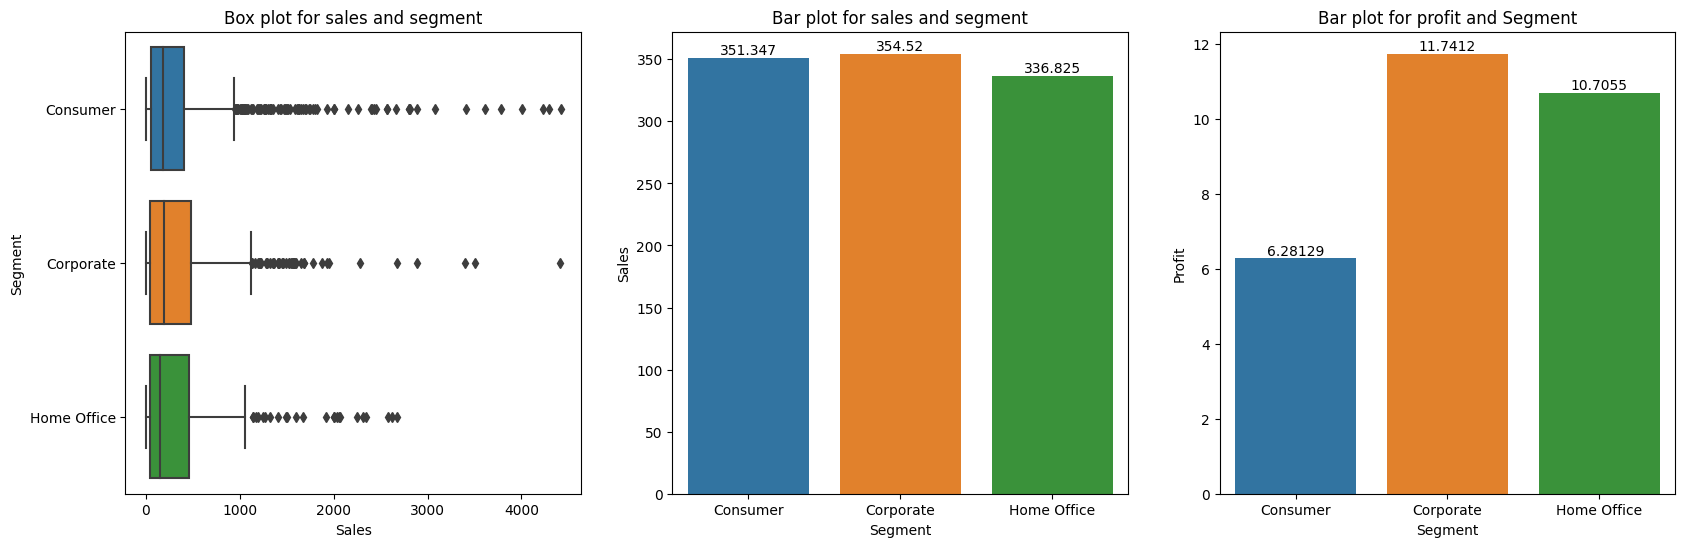

In [20]:
#Plot for the features sales and segment
plt.subplots(1,3,figsize=(20,6))

plt.subplot(131)
sns.boxplot(data=df, x='Sales', y='Segment')
plt.title('Box plot for sales and segment')

plt.subplot(132)
ax=sns.barplot(data=df, y='Sales', x='Segment',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for sales and segment')

plt.subplot(133)
ax=sns.barplot(data=df, y='Profit', x='Segment',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for profit and Segment')
plt.show()

## Interpretation:- For Segment
        * The Sales and profits are highest in 'Corporate Segment' compared to other segments.
        * In 'Consumer Segment' the Sales are second highest but the profits are least compared to other segments.
        * The Sales are least in 'Home Office' but the profits are more compared to 'Consumer Segment' and 
        less compared to 'Corporate segment'.     

## 3.MULTIVARIATE ANALYSIS


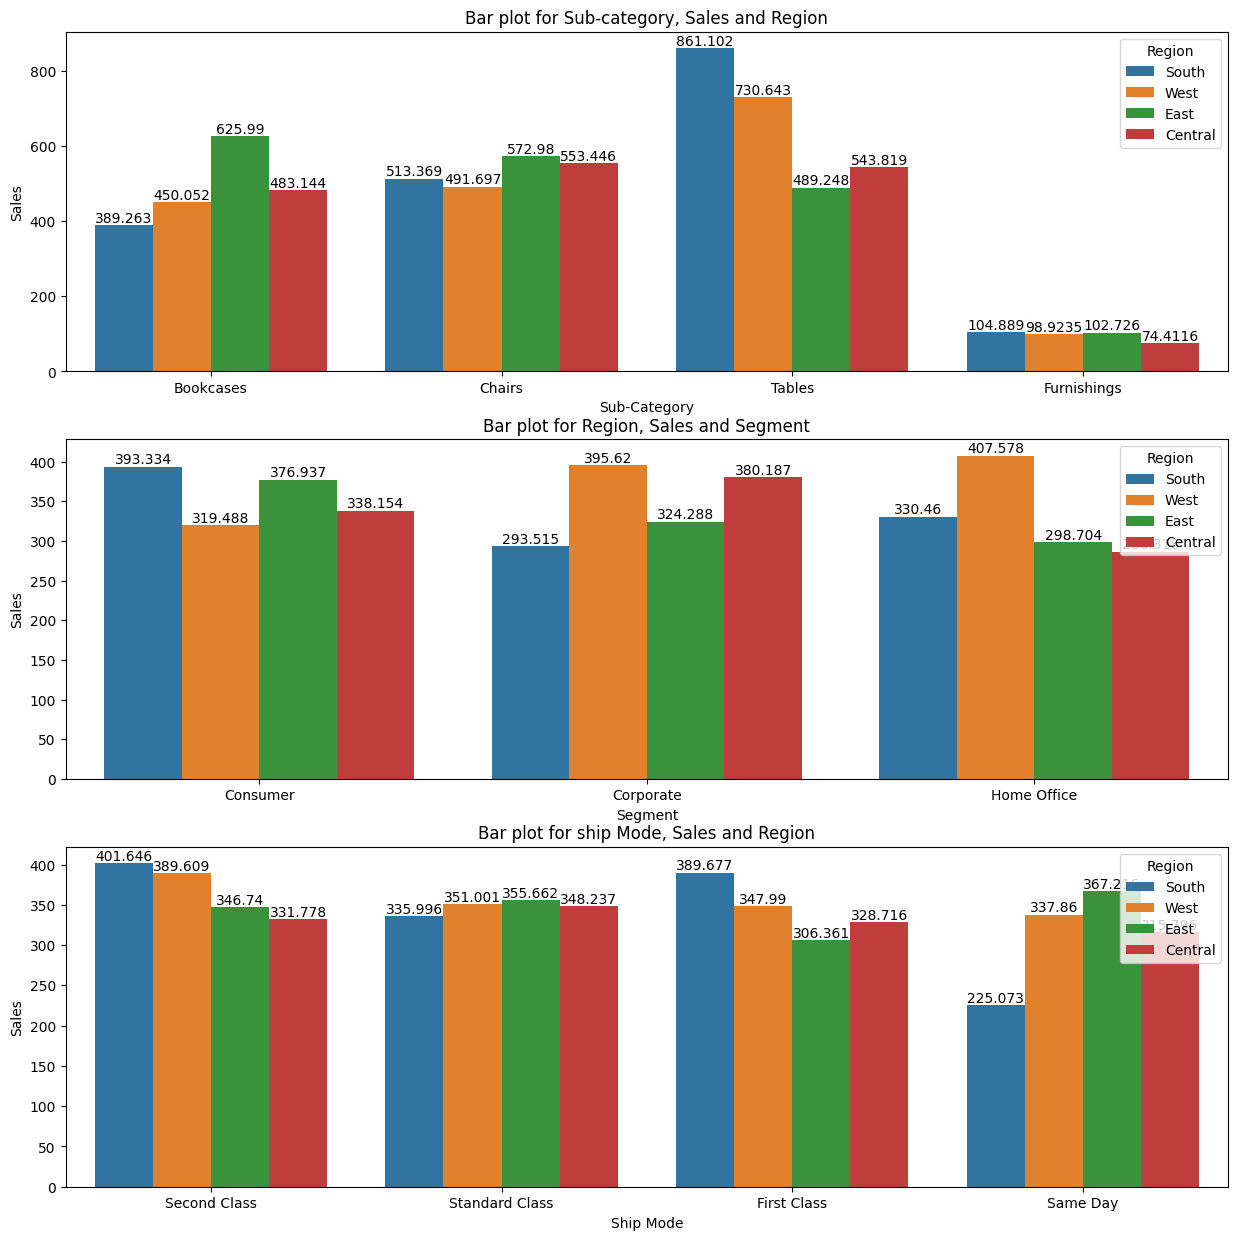

In [21]:
plt.subplots(3,1,figsize=(15,15))

plt.subplot(311)
ax=sns.barplot(data=df, x='Sub-Category', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Sub-category, Sales and Region')

plt.subplot(312)
ax=sns.barplot(data=df, x='Segment', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Region, Sales and Segment')

plt.subplot(313)
ax=sns.barplot(data=df, x='Ship Mode', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for ship Mode, Sales and Region')
plt.show()

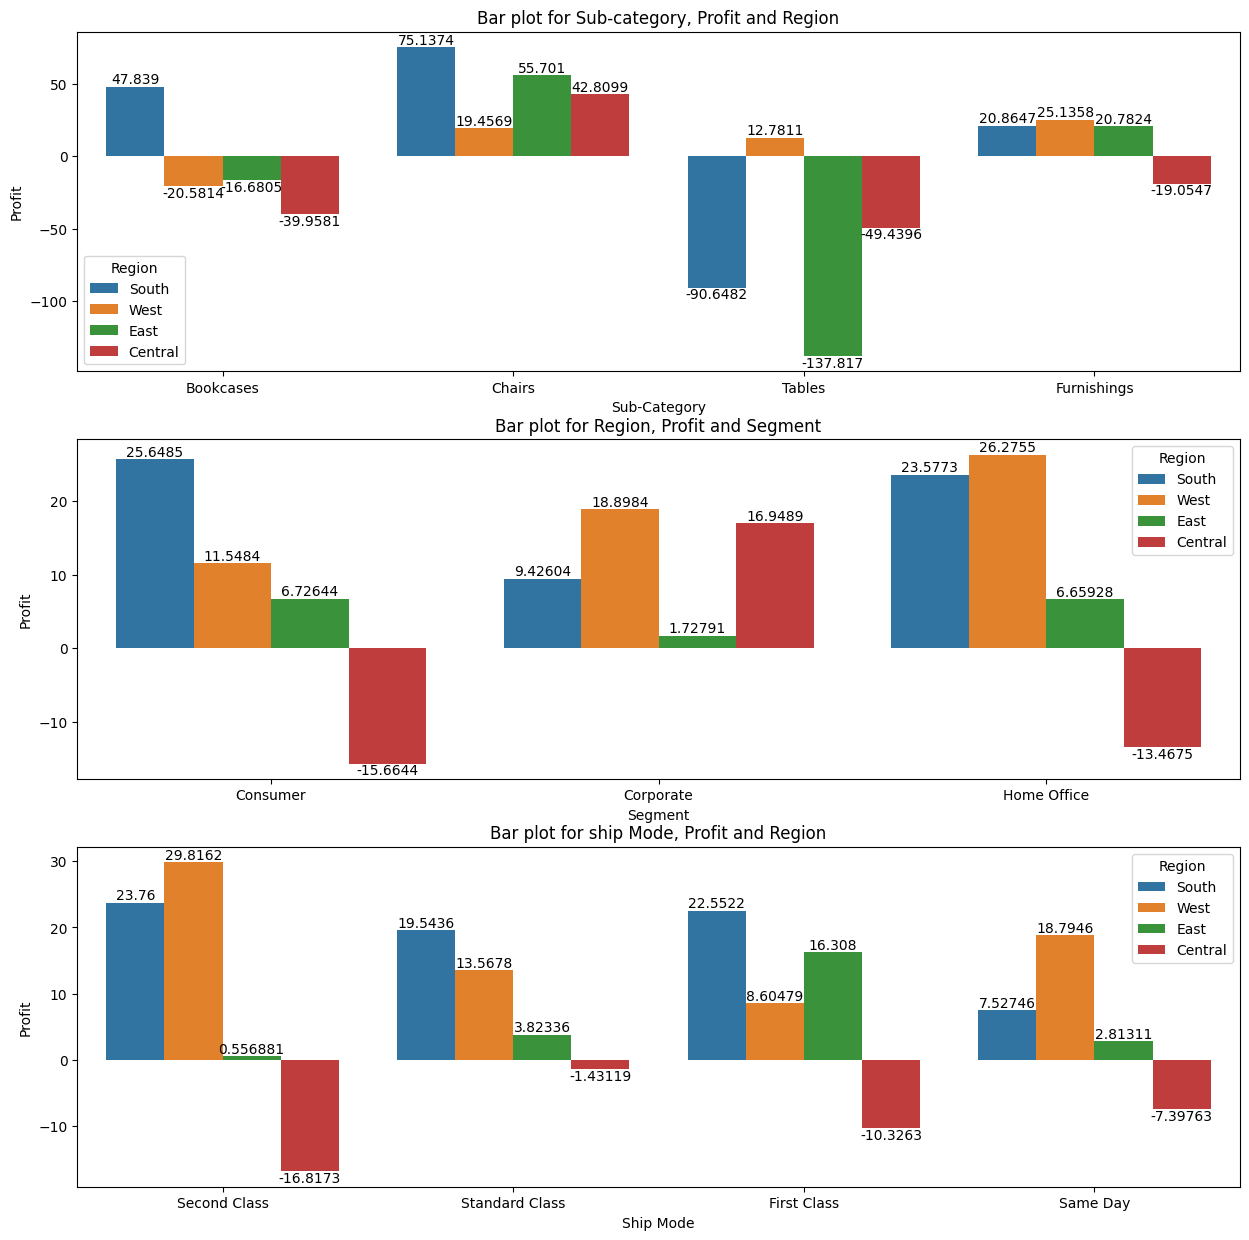

In [22]:
plt.subplots(3,1,figsize=(15,15))

plt.subplot(311)
ax=sns.barplot(data=df, x='Sub-Category', y='Profit',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Sub-category, Profit and Region')

plt.subplot(312)
ax=sns.barplot(data=df, x='Segment', y='Profit',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Region, Profit and Segment')

plt.subplot(313)
ax=sns.barplot(data=df, x='Ship Mode', y='Profit',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for ship Mode, Profit and Region')
plt.show()

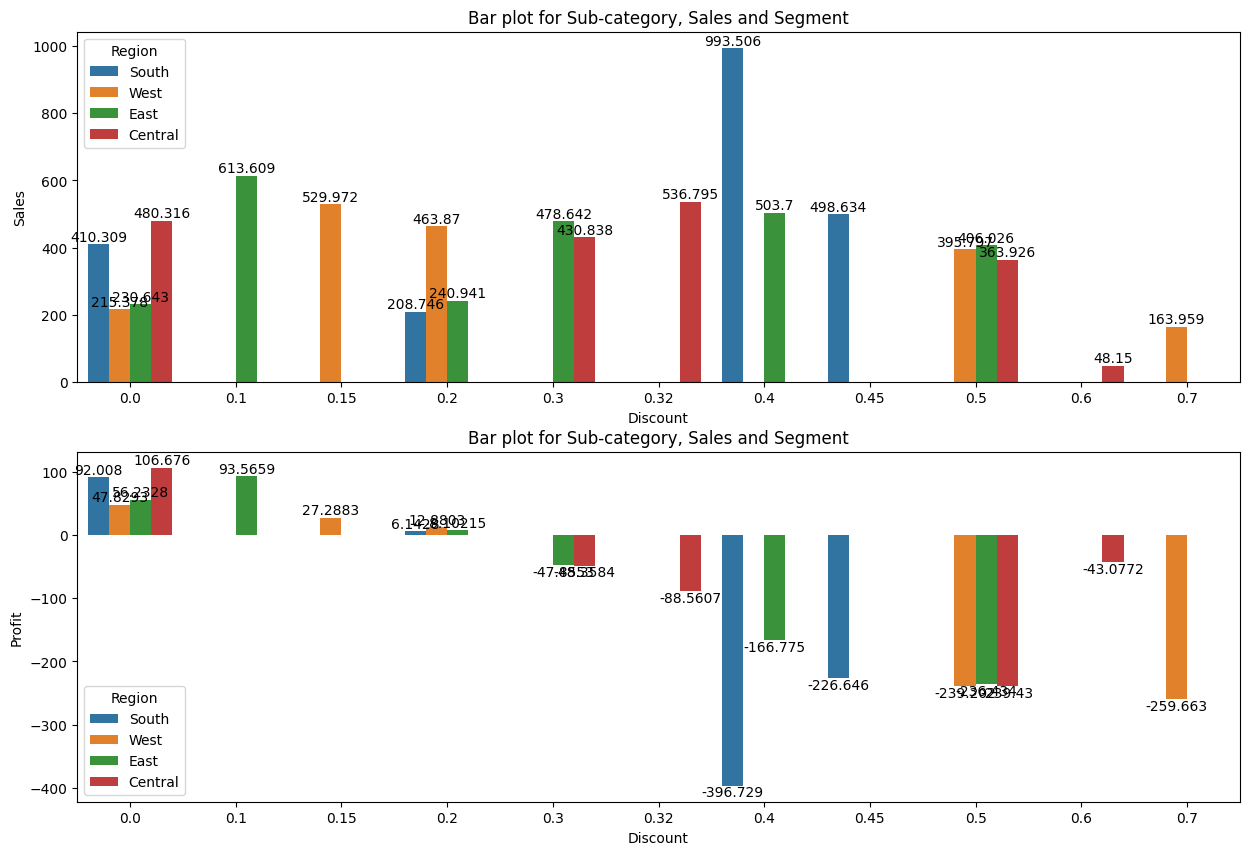

In [23]:
plt.subplots(2,2,figsize=(15,10))

plt.subplot(211)
ax=sns.barplot(data=df, x='Discount', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Sub-category, Sales and Segment')

plt.subplot(212)
ax=sns.barplot(data=df, x='Discount', y='Profit',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Sub-category, Sales and Segment')

plt.show()

## Interpretation:-
         * There are losses for the products if the discount is more than 0.2 in all the regions.

In [24]:
# df[["Sales", "Region"]]

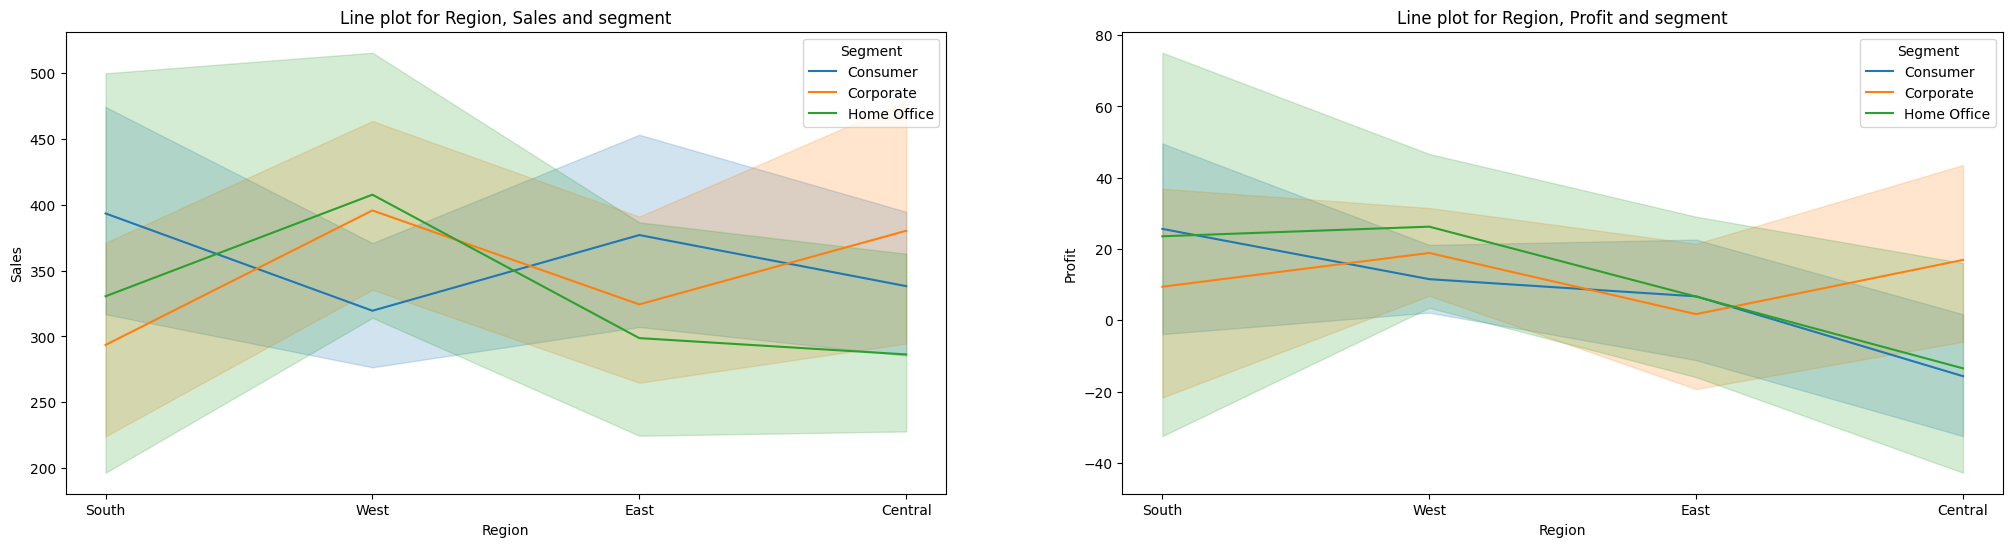

In [25]:
plt.subplots(1,2,figsize=(25,6))

plt.subplot(121)
sns.lineplot(data=df,x='Region',y='Sales',hue='Segment')
plt.title('Line plot for Region, Sales and segment')

plt.subplot(122)
sns.lineplot(data=df,x='Region',y='Profit',hue='Segment')
plt.title('Line plot for Region, Profit and segment')
plt.show()

## Interpretation:-
      * For 'Home Office Segment' the Sales and profits are highest in the 'West Region' and least in 'Central region'.
      * For 'Corporate Segment' the Sales are highest in 'West region' and least in 'South region' and profits are 
      highest in 'Central region' and least in 'East region'.
      * For 'Consumer Segment' the Sales are highest in 'south region' and least in 'West region' and profits are 
      highest in 'South region' and least in 'Central region'.

# Data Preprocessing

In [26]:
df1 = df[['Order Date','Sales']]
df1.head(2)

Order Date   Sales
0 2016-11-08  261.96
1 2016-11-08  731.94

In [27]:
# Change index to date
df1.set_index("Order Date", inplace=True)
d = df1[["Sales"]]
d.head(2)

Sales
Order Date        
2016-11-08  261.96
2016-11-08  731.94

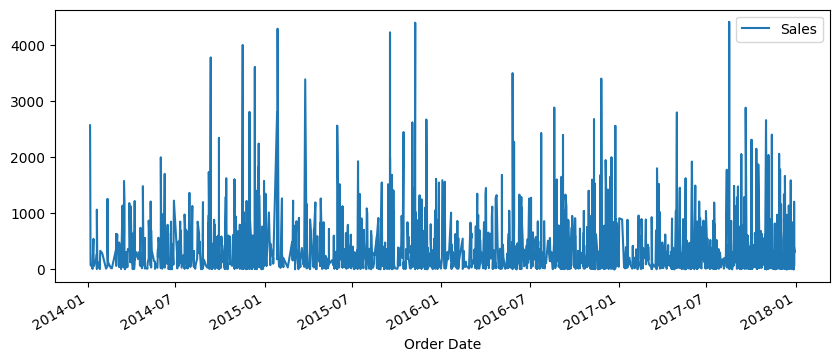

In [28]:
# plot Sales with Order date

# sns.lineplot(data=d)
d.plot(kind="line", figsize=(10,4))
plt.show()

In [29]:
# Resample the data to weekly data using the mean function
df2 = df1.resample(rule="1W").mean()
df2.head(2)

Sales
Order Date          
2014-01-12  678.1070
2014-01-19  250.0946

In [30]:
#check for structure after resampling
df2.shape

(208, 1)

In [31]:
# Check for null values
df2.isnull().sum()

Sales    0
dtype: int64

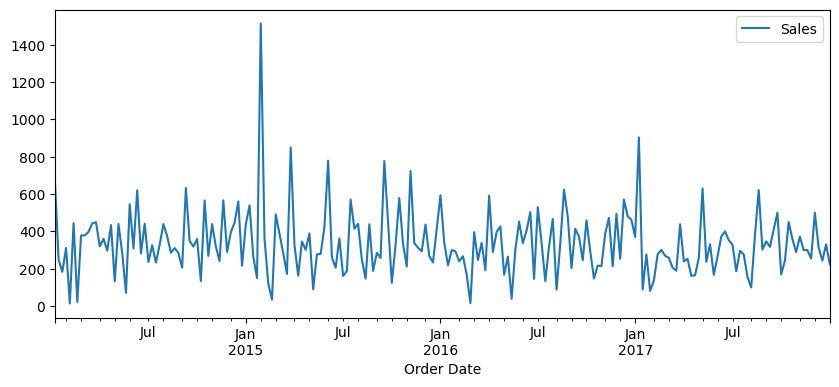

In [32]:
#plotting the sales with order date after resampling to weekly data
df2.plot(kind="line", figsize=(10,4))
plt.show()


In [33]:
# Seasonal decomposition of the time series data to view trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
decomp1 = seasonal_decompose(df2,period=7)

In [35]:
d_trend = decomp1.trend
d_seasonal = decomp1.seasonal
d_residual = decomp1.resid

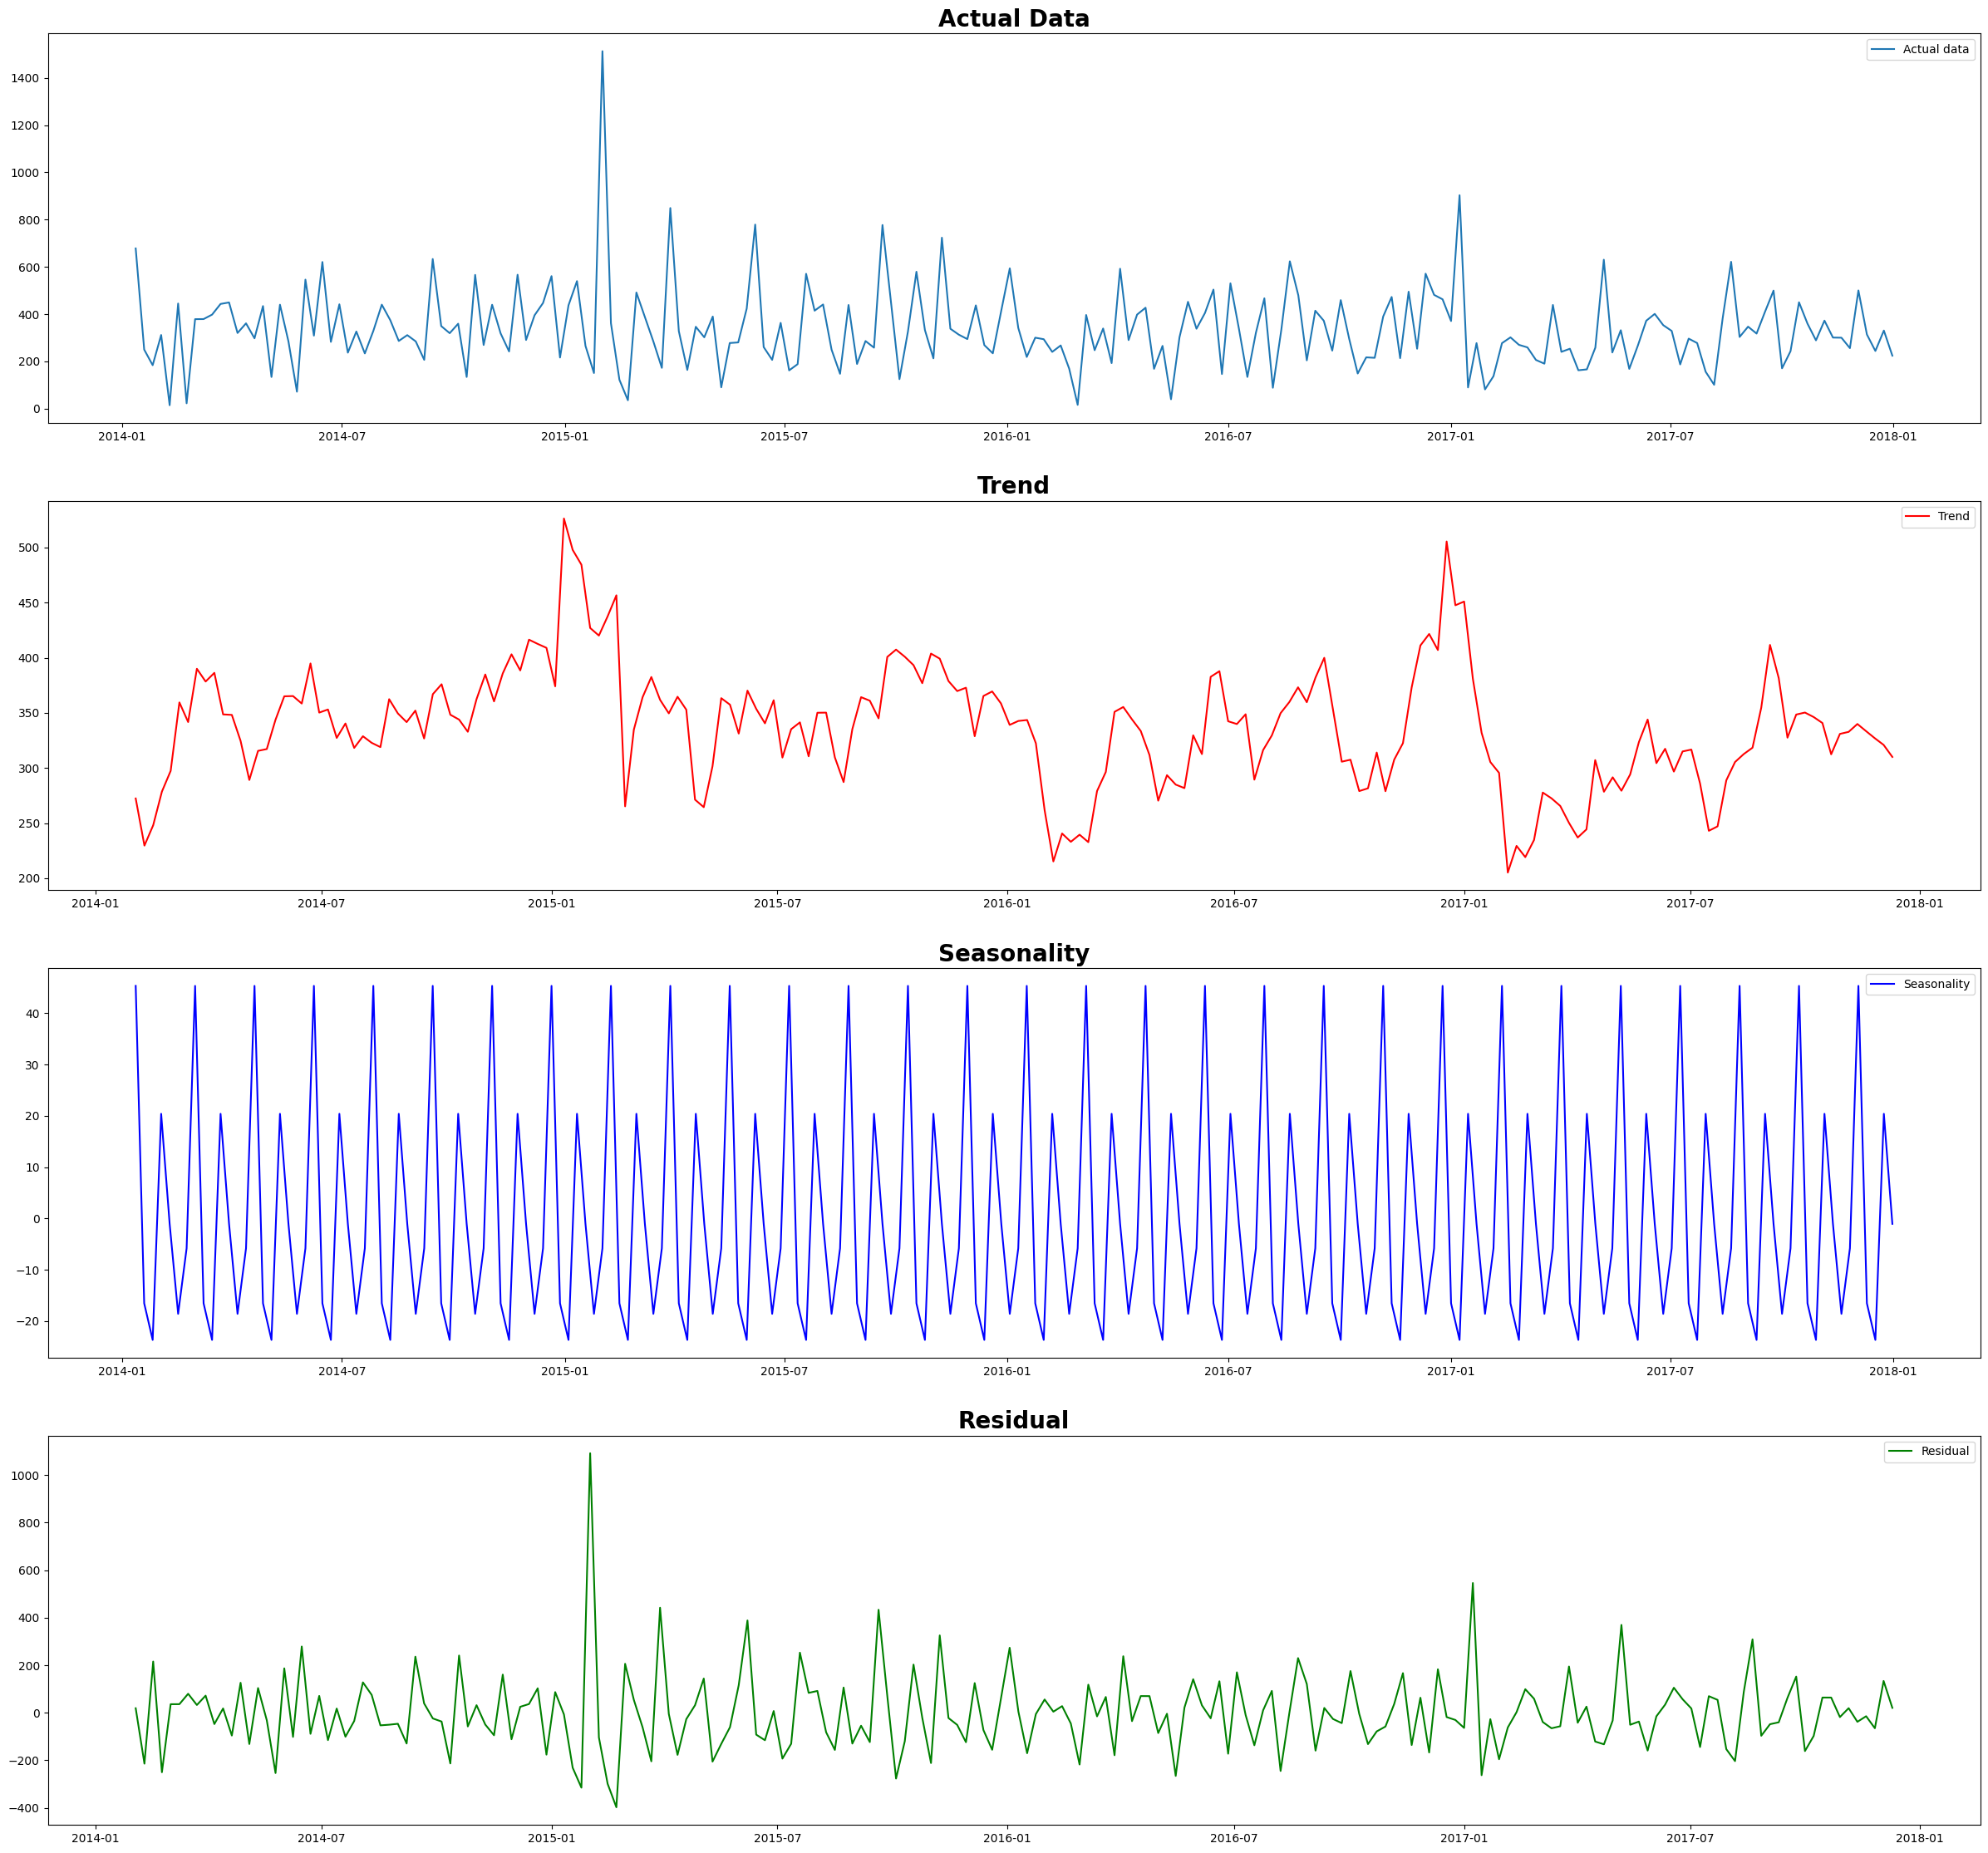

In [36]:
#plots for seasonal components
plt.subplots(4,1,figsize=(30,28))

plt.subplot(411)
plt.plot(df2['Sales'],label='Actual data')
plt.title('Actual Data',fontweight='bold',size=20)
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,color='r',label='Trend')
plt.title('Trend',fontweight='bold',size=20)
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,color='b',label='Seasonality')
plt.title('Seasonality',fontweight='bold',size=20)
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,color='g',label='Residual')
plt.title('Residual',fontweight='bold',size=20)
plt.legend(loc='best')
plt.show()

## Interpretation:-
          * From the graph-1 we can see the actual data in which trend,seasonality and noise are present.
          * From graph-2 we can see the upward trend.
          * From graph-3 we can see the Seasonality present in the data.
          * from graph-4 we can see the presence of noise in the data.

In [37]:
#moving average

lags = [3,6,9,12]
moving_av = []
for i in lags:
    moving_avg = df2.rolling(window=i).mean()
    moving_av.append(moving_avg)

In [38]:
df2.head(2)

Sales
Order Date          
2014-01-12  678.1070
2014-01-19  250.0946

In [39]:
#creating a dataframe for assigning the actual data and moving averages
df3 = df2.copy()

df3.rename(columns={"Sales":"Actual_data"}, inplace=True)
df3['Moving_average3'] = moving_av[0]
df3['Moving_average6'] = moving_av[1]
df3['Moving_average9'] = moving_av[2]
df3['Moving_average12'] = moving_av[3]

df3.head()

Actual_data  Moving_average3  Moving_average6  Moving_average9  \
Order Date                                                                   
2014-01-12   678.107000              NaN              NaN              NaN   
2014-01-19   250.094600              NaN              NaN              NaN   
2014-01-26   183.995333       370.732311              NaN              NaN   
2014-02-02   311.833000       248.640978              NaN              NaN   
2014-02-09    14.560000       170.129444              NaN              NaN   

            Moving_average12  
Order Date                    
2014-01-12               NaN  
2014-01-19               NaN  
2014-01-26               NaN  
2014-02-02               NaN  
2014-02-09               NaN

<Figure size 1500x600 with 0 Axes>

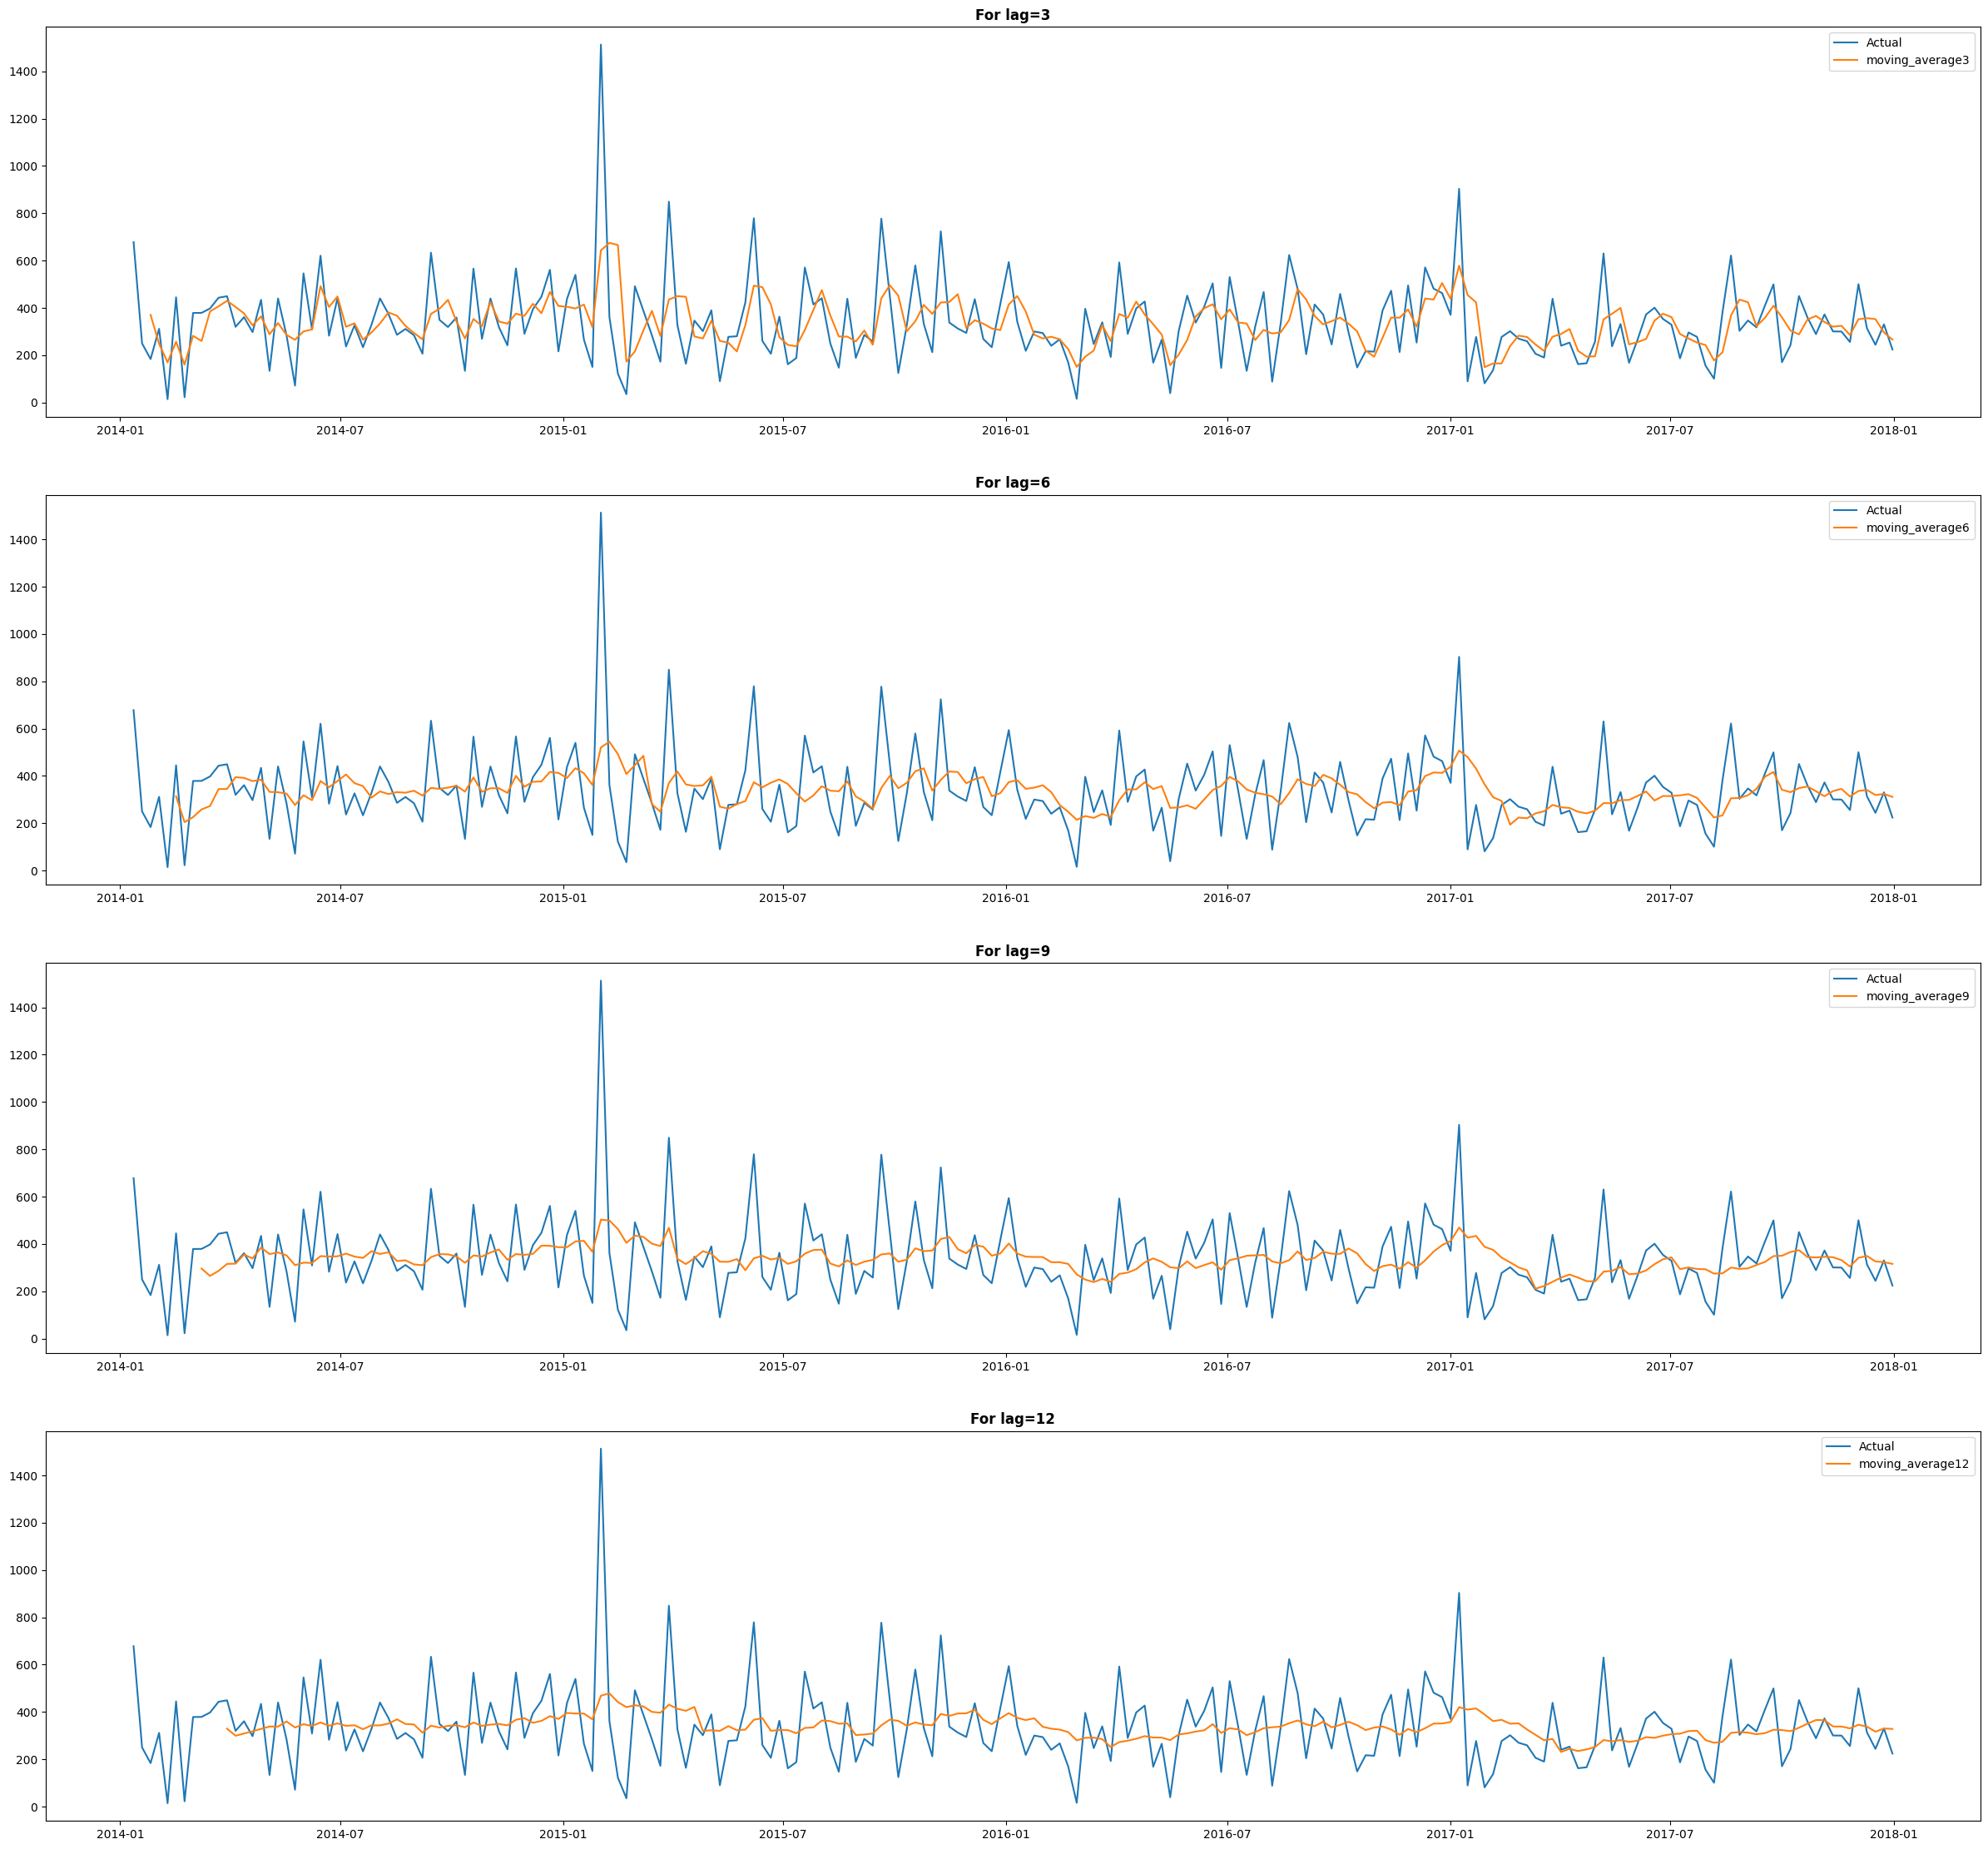

In [40]:
#plotting for actual and different lags
plt.figure(figsize=(15,6))
fig,ax=plt.subplots(4,1,figsize=(30,28))

plt.subplot(411)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average3'],label='moving_average3')
plt.title('For lag=3',fontweight='bold', size=12)
plt.legend(loc='best')


plt.subplot(412)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average6'],label='moving_average6')
plt.title('For lag=6',fontweight='bold', size=12)
plt.legend(loc='best')


plt.subplot(413)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average9'],label='moving_average9')
plt.title('For lag=9',fontweight='bold', size=12)
plt.legend(loc='best')


plt.subplot(414)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average12'],label='moving_average12')
plt.title('For lag=12',fontweight='bold', size=12)
plt.legend(loc='best')

plt.show()

In [41]:
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [42]:
df2.head(2)

Sales
Order Date          
2014-01-12  678.1070
2014-01-19  250.0946

In [43]:
data = df2['Sales']
data

Order Date
2014-01-12    678.107000
2014-01-19    250.094600
2014-01-26    183.995333
2014-02-02    311.833000
2014-02-09     14.560000
                 ...    
2017-12-03    500.255375
2017-12-10    314.085857
2017-12-17    244.201000
2017-12-24    330.638318
2017-12-31    224.309156
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

In [44]:
def simplesmoothening(data,alpha):
    model=SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    fcast = model.fittedvalues
    d1=pd.DataFrame({'Actual':data,'Forecast':fcast})
    return(model,d1)

In [45]:
#smoothening parameter ---> alpha
alphas = [0.0,0.2,0.4,0.6,0.8]
d_simple_exp = {}  #stores forecasted values for a given alpha
models = []

In [46]:
for a in alphas:
    m,d = simplesmoothening(df2['Sales'],a)
    d_simple_exp[a]=d.Forecast
    models.append(m)

In [47]:
models

<Figure size 1500x600 with 0 Axes>

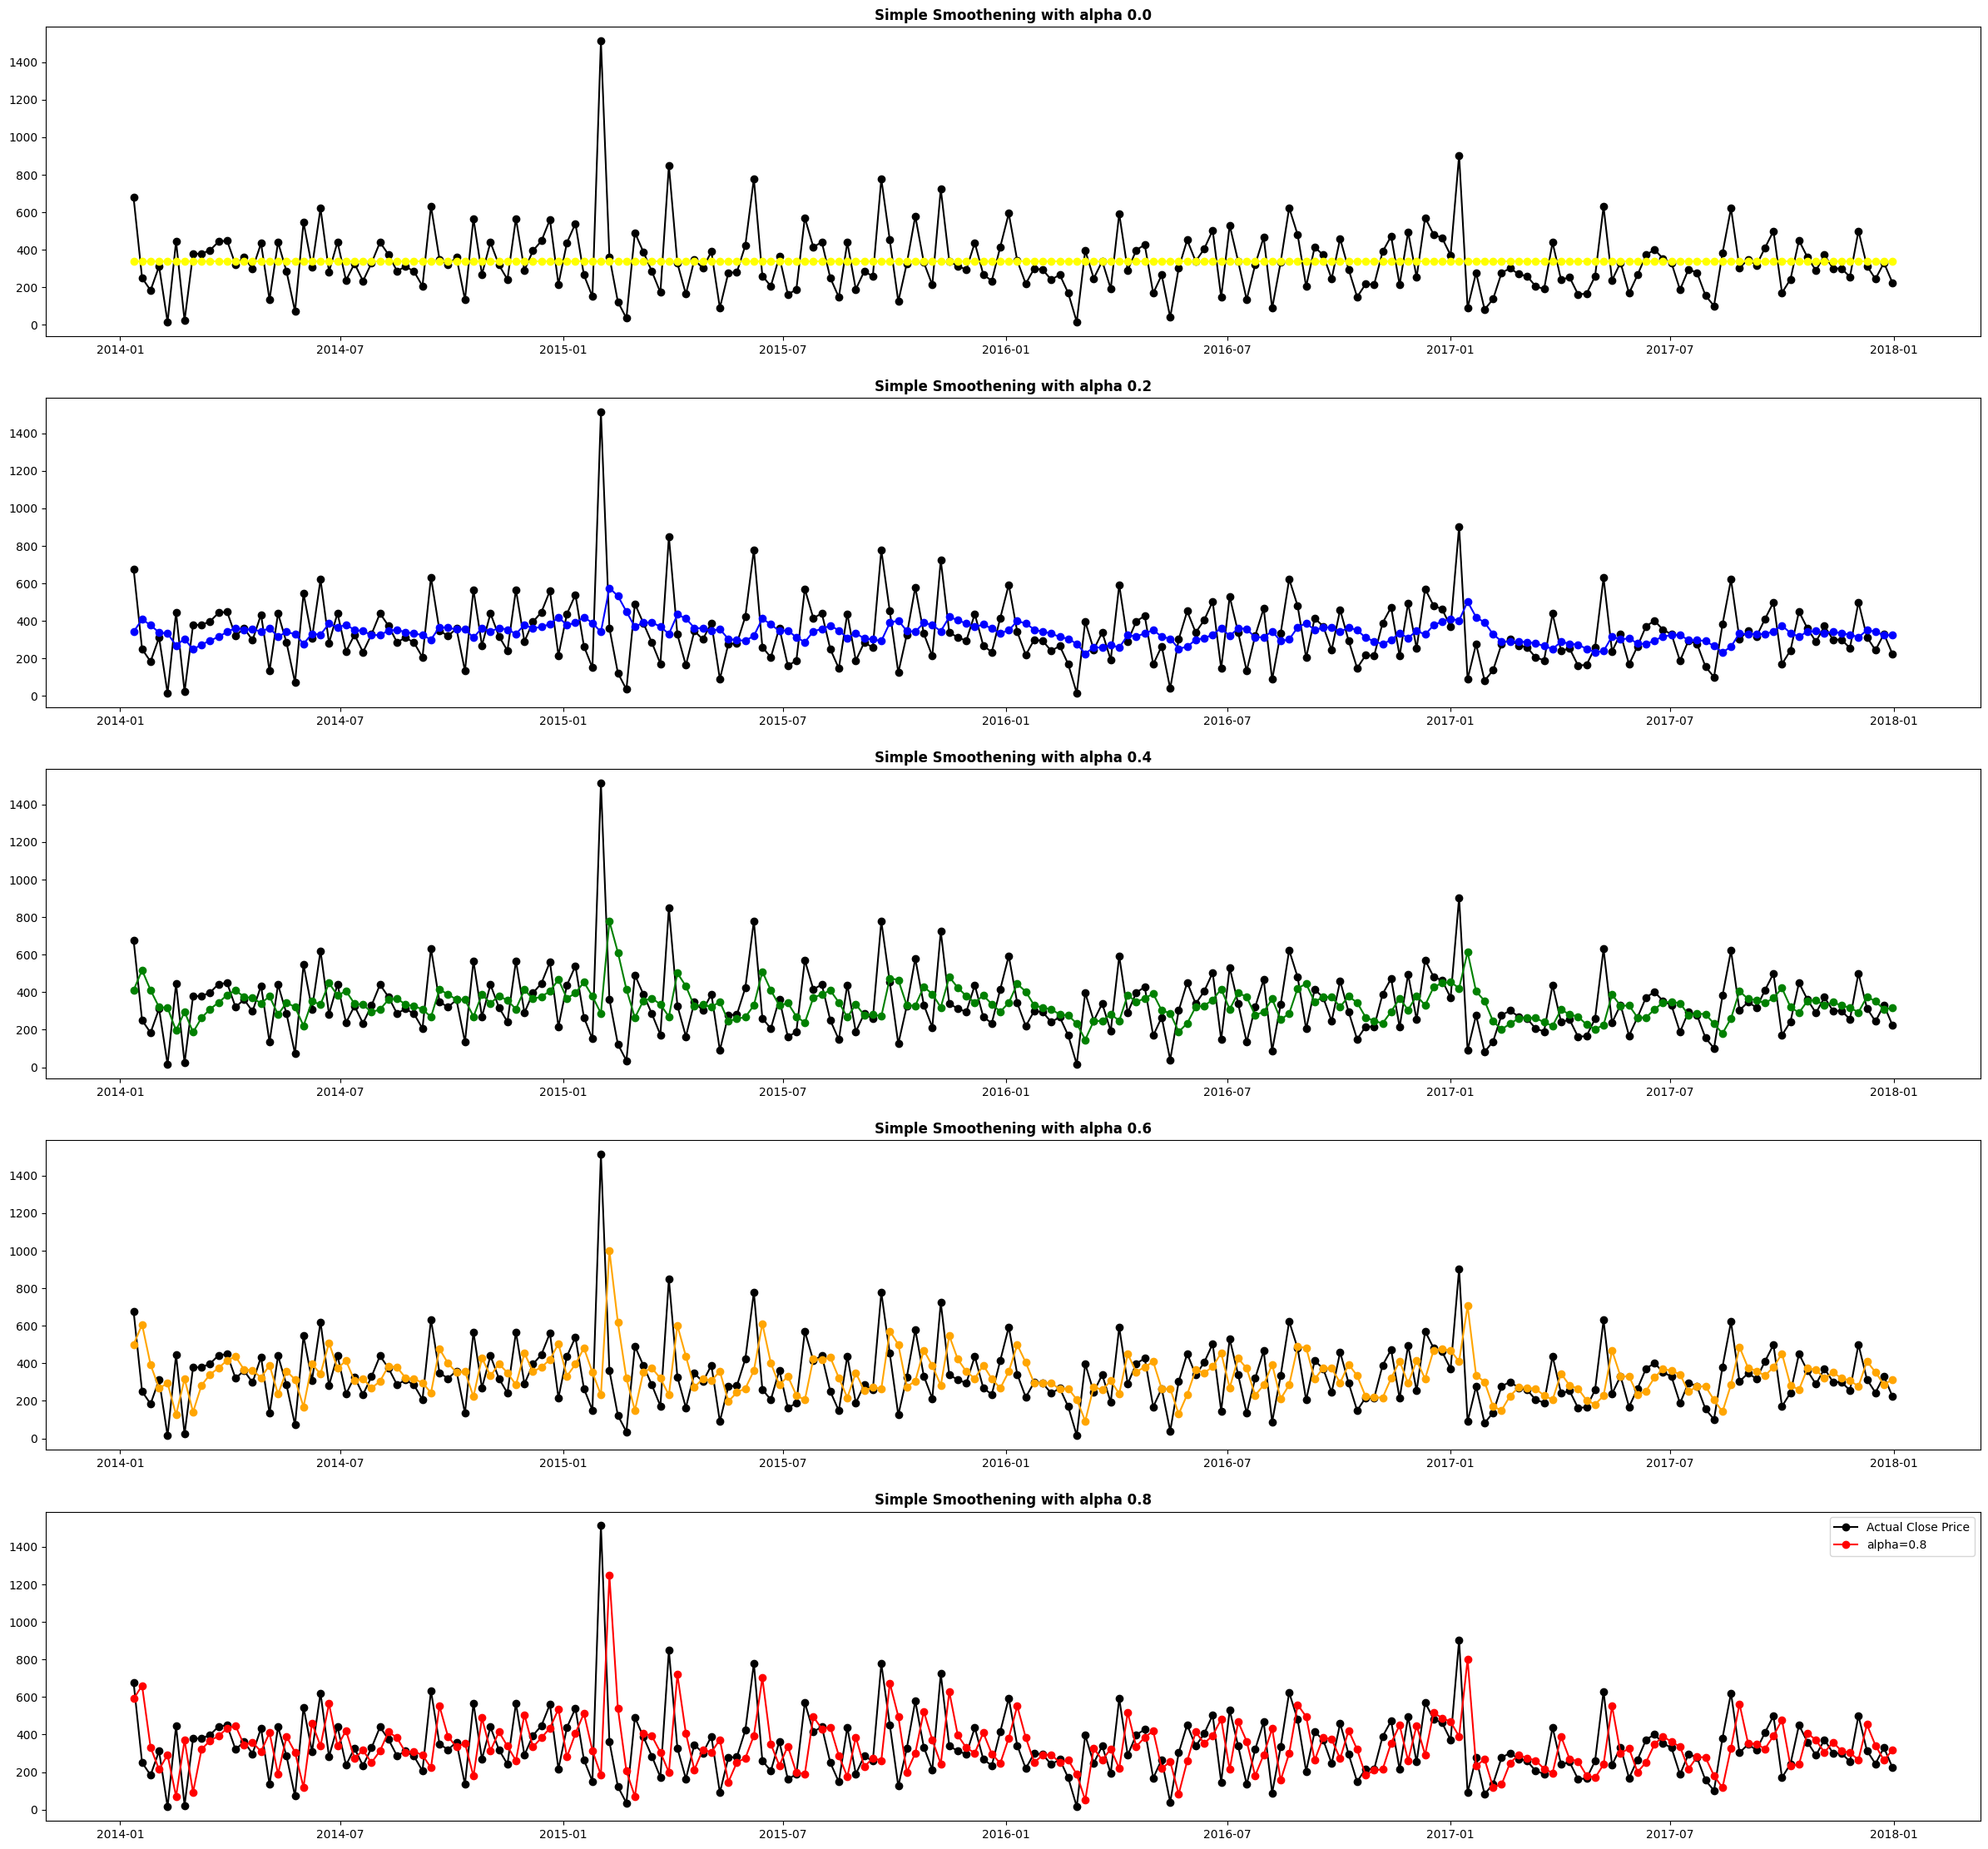

In [48]:
plt.figure(figsize=(15,6))
fig,ax=plt.subplots(5,1,figsize=(30,28))

plt.subplot(511)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.0), marker='o', color='yellow',label='alpha=0.0')
plt.title('Simple Smoothening with alpha 0.0',fontweight='bold', size=12)

plt.subplot(512)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.2), marker='o', color='blue',label='alpha=0.2')
plt.title('Simple Smoothening with alpha 0.2',fontweight='bold', size=12)

plt.subplot(513)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.4), marker='o', color='green',label='alpha=0.4')
plt.title('Simple Smoothening with alpha 0.4',fontweight='bold', size=12)

plt.subplot(514)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.6), marker='o', color='orange',label='alpha=0.6')
plt.title('Simple Smoothening with alpha 0.6',fontweight='bold', size=12)

plt.subplot(515)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.8), marker='o', color='red',label='alpha=0.8')
plt.title('Simple Smoothening with alpha 0.8',fontweight='bold', size=12)


plt.legend(loc='best')
plt.show()

## Interpretation:-
    * Here in Simple Exponential smoothening we can see that for the alpha value of 0.2, 
    the forecast line gets smoothened.

In [49]:
# For calculating errors
model=SimpleExpSmoothing(data).fit(smoothing_level=0.2)
fcast_se = model.fittedvalues

In [50]:
from sklearn.metrics import mean_squared_error
rmse_se = mean_squared_error(data,fcast_se,squared=False)
rmse_se

185.64325755249416

#### 2.Double Exponential

In [51]:
# Double exponential Smoothing
alpha = 0.2; beta = 0.35

In [52]:
model1 = ExponentialSmoothing(data,trend='Additive').fit(smoothing_level=alpha, smoothing_trend=beta)

In [53]:
# forecast
fcast_de = model1.fittedvalues

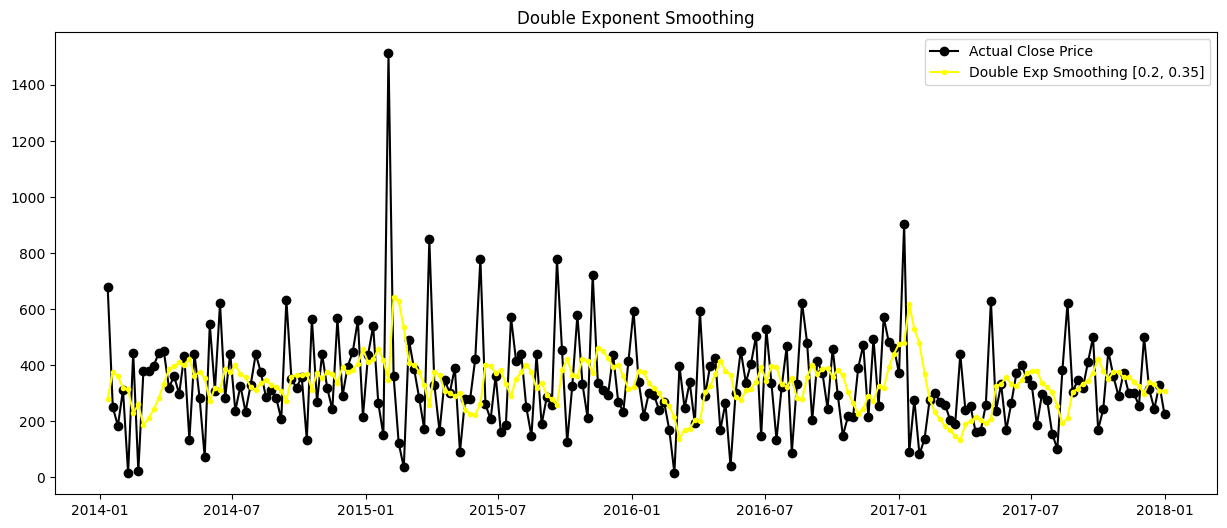

In [54]:
#plot the original and smoothened data

plt.figure(figsize=(15,6))
plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(fcast_de, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.35]')
plt.legend()
plt.title('Double Exponent Smoothing')
plt.show()

In [55]:
rmse_de = mean_squared_error(data,fcast_de,squared=False)
rmse_de

199.59717558424933

## 3.Triple Exponential Smoothening

In [56]:
## Triple Exponential Smoothing (tes)
alpha = 0.2; beta = 0.35; gama =0.5

In [57]:
model_tes = ExponentialSmoothing(data, trend='additive', seasonal='additive',seasonal_periods=7).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gama)


In [58]:
#forecast
fcast_tes=model_tes.fittedvalues
fcast_tes

Order Date
2014-01-12    517.673204
2014-01-19    354.021735
2014-01-26    233.506396
2014-02-02    327.925207
2014-02-09     92.162228
                 ...    
2017-12-03    362.440579
2017-12-10    343.507612
2017-12-17    289.756530
2017-12-24    332.078639
2017-12-31    299.243832
Freq: W-SUN, Length: 208, dtype: float64

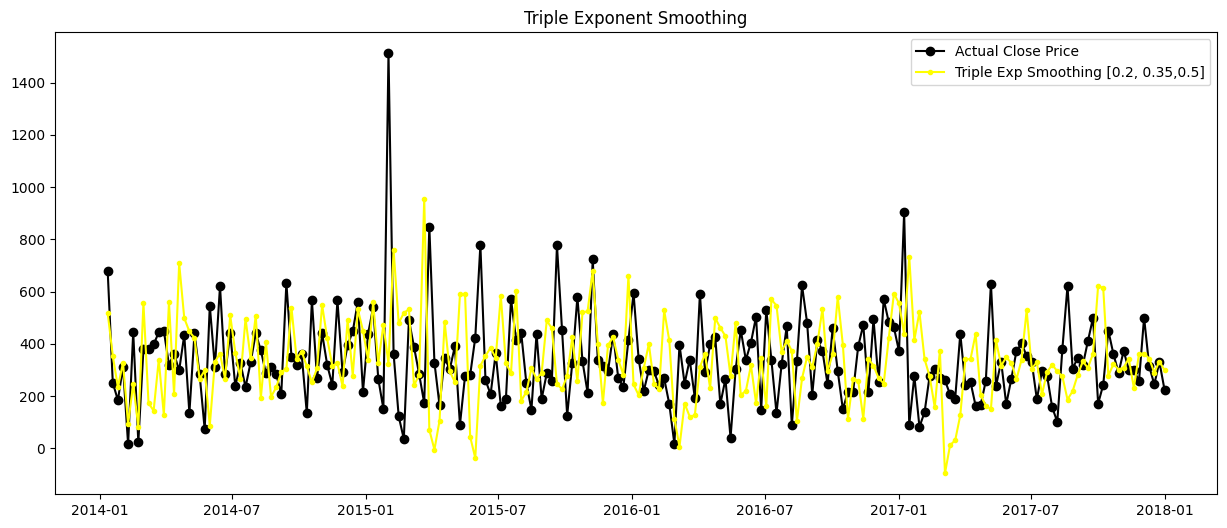

In [59]:
#plot
plt.figure(figsize=(15,6))
plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(fcast_tes, marker='.',color='yellow',label='Triple Exp Smoothing [0.2, 0.35,0.5]')

plt.legend()
plt.title('Triple Exponent Smoothing')
plt.show()

In [60]:
rmse_tes = mean_squared_error(data,fcast_tes,squared=False)
rmse_tes

238.8665504183645

In [61]:
# Checking for stationarity
from statsmodels.tsa.stattools import adfuller
def checkstationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    
    if pvalue < 0.05:
        ret = 'Data is Stationary. Proceed to model building'
    else:
        ret = 'Data is not stationary. Make data stationary and proceed to model building'
        
    return(ret)

In [62]:
df2.head(3)

Sales
Order Date            
2014-01-12  678.107000
2014-01-19  250.094600
2014-01-26  183.995333

In [63]:
checkstationarity(df2)

8.124101346205004e-22


'Data is Stationary. Proceed to model building'

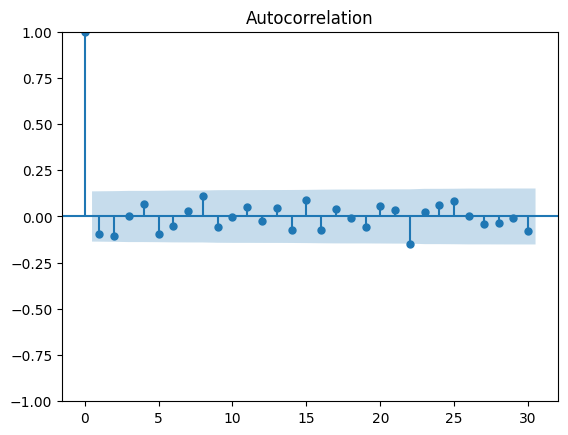

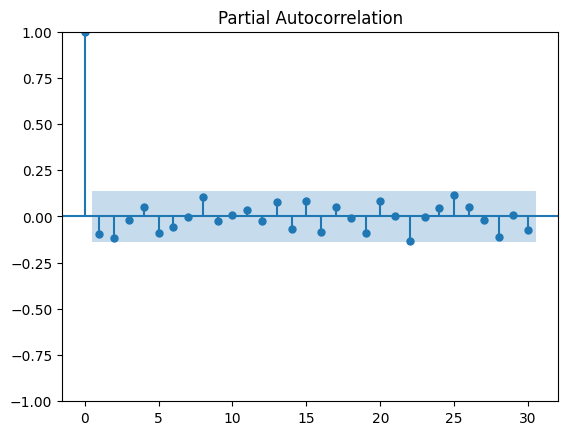

In [64]:
# plotting acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df2,lags=30)
plot_pacf(df2,lags=30)
plt.show()

In [65]:
p=3;q=4

In [66]:
#splitting the data
num = int(0.7*len(df2))

train = df2.iloc[:num]
test = df2.iloc[num:]

train.shape,test.shape

((145, 1), (63, 1))

In [67]:
#checking for best p,d and q values by building arima model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def arima_model(data):
    list1 = []
    for p in range(2):
        for q in range(2):
            list1.append((p,0,q))
            
    model = []
    for i in list1:
        m=ARIMA(train,order=i).fit()
        model.append(m)
        
    aic=[]
    bic=[]
    for j in model[0:]:
        aic.append(j.aic)
        bic.append(j.bic)
                
    forecast = []
    for v in model:
        f=v.predict(0,len(test)-1)
        forecast.append(f)
                    
    RMSE=[]
    for a in forecast[0:]:
        rmse = mean_squared_error(test,a,squared=False)
        RMSE.append(round(rmse,3))
        
        
    
    v1 = pd.DataFrame({'model':model,'p,d,q':list1,'RMSE':RMSE,'AIC':aic,'BIC':bic})
    
        
    return(v1)

    

In [68]:
dff = arima_model(train)
dff

model      p,d,q     RMSE  \
0  <statsmodels.tsa.arima.model.ARIMAResultsWrapp...  (0, 0, 0)  145.265   
1  <statsmodels.tsa.arima.model.ARIMAResultsWrapp...  (0, 0, 1)  143.753   
2  <statsmodels.tsa.arima.model.ARIMAResultsWrapp...  (1, 0, 0)  142.874   
3  <statsmodels.tsa.arima.model.ARIMAResultsWrapp...  (1, 0, 1)  143.134   

           AIC          BIC  
0  1928.240281  1934.193749  
1  1925.947630  1934.877831  
2  1927.436320  1936.366522  
3  1925.390514  1937.297449

In [69]:
# model with minimum RMSE
dff[dff.RMSE == dff['RMSE'].min()]

model      p,d,q     RMSE  \
2  <statsmodels.tsa.arima.model.ARIMAResultsWrapp...  (1, 0, 0)  142.874   

          AIC          BIC  
2  1927.43632  1936.366522

In [70]:
from pmdarima.arima import auto_arima

In [71]:
stepwise_fit = auto_arima(df2['Sales'],start_p=0,max_p=3,start_q=0,max_q=4,trace=True,seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2738.479, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2738.566, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2738.023, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3061.955, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2741.195, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2737.954, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2740.230, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2739.946, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2741.794, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2934.784, Time=0.06 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.611 seconds


## Model Building

## Model Building

In [72]:
def arima_func(data,p,d,q):
    
    m1 = ARIMA(data,order=(p,d,q)).fit()
    predictions = m1.predict(len(train),len(train)+len(test)-1)
    
    return m1.summary(),predictions

In [73]:
summary_arma, pred_arma = arima_func(train,1,0,0)

In [74]:
summary_arma

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  145
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -960.718
Date:                Fri, 19 May 2023   AIC                           1927.436
Time:                        10:50:06   BIC                           1936.367
Sample:                    01-12-2014   HQIC                          1931.065
                         - 10-16-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.0579     16.196     21.305      0.000     313.315     376.801
ar.L1         -0.1400      0.106     -1.327      0.184      -0.347       0.067
sigma2       3.33e+04   2189.840     15.207      0.000     2.9e+04    3.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               613.16
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             1.86
Prob(H) (two-sided):                  0.89   Kurtosis:                        12.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
pred_arma

2016-10-23    372.539910
2016-10-30    341.209338
2016-11-06    345.596890
2016-11-13    344.982455
2016-11-20    345.068500
                 ...    
2017-12-03    345.057931
2017-12-10    345.057931
2017-12-17    345.057931
2017-12-24    345.057931
2017-12-31    345.057931
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

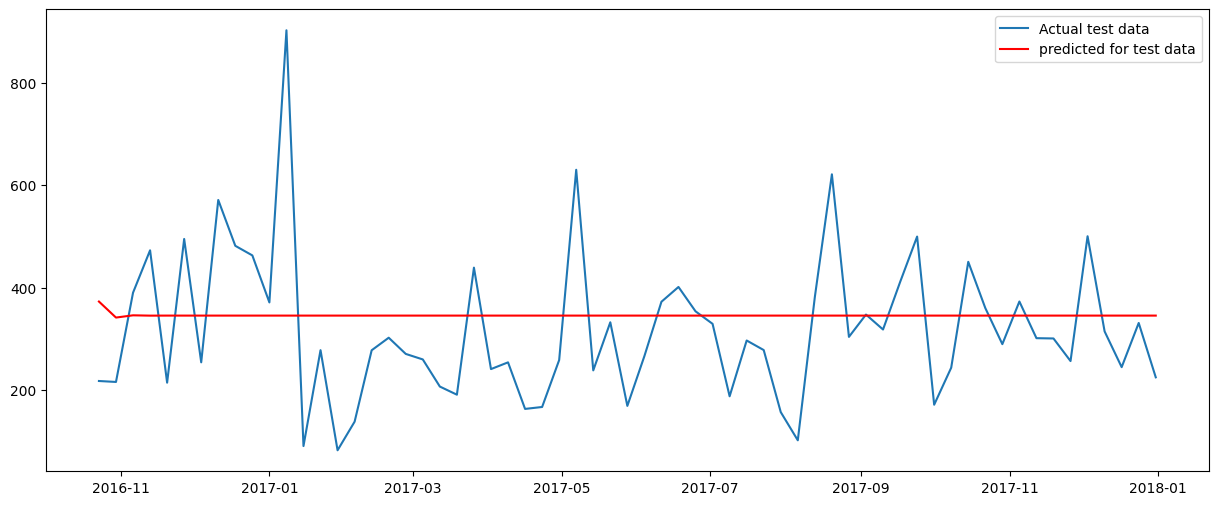

In [76]:
plt.figure(figsize=(15,6))

plt.plot(test['Sales'],label='Actual test data')
plt.plot(pred_arma,'r',label='predicted for test data')
plt.legend(loc='best')
plt.show()

In [77]:
#forecasting for next 1year
model1 = ARIMA(train,order=(1,0,0)).fit()

fcast_arma = model1.predict(len(df2),len(df2)+52,type='levels')

In [78]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model1.resid,lags=[1],return_df=True)['lb_pvalue'].values

if pvalue <0.05:
    print('not good')
else:
    print('good')

good


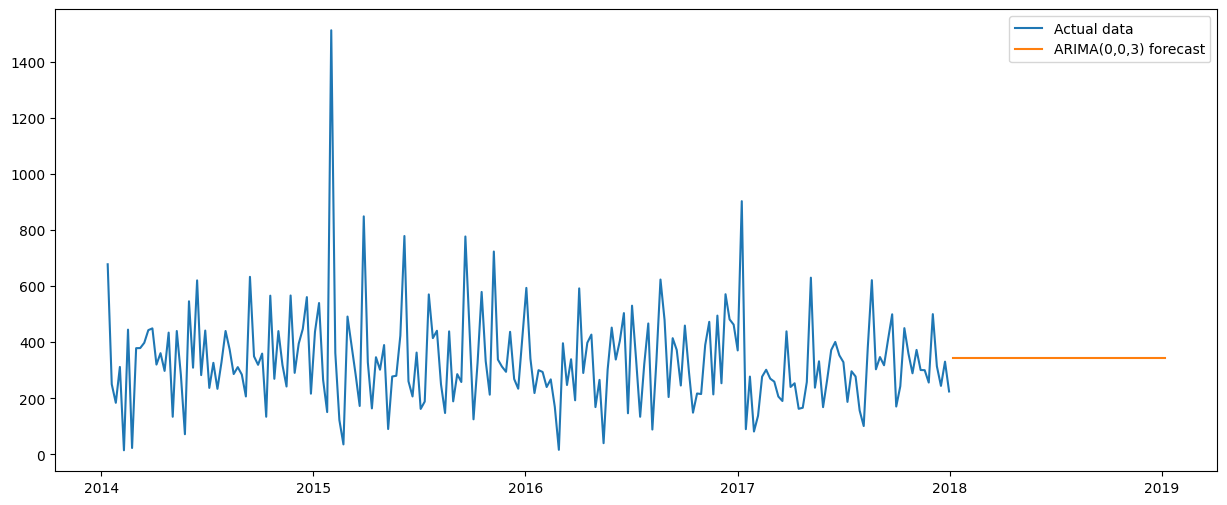

In [79]:
plt.figure(figsize=(15,6))

plt.plot(df2.Sales,label='Actual data')
plt.plot(fcast_arma,label='ARIMA(0,0,3) forecast')
plt.legend(loc='best')
plt.show()

In [80]:
AIC_ARMA = model1.aic
BIC_ARMA = model1.bic
AIC_ARMA,BIC_ARMA

(1927.4363203558032, 1936.366521583065)

In [81]:
# Evaluation of data
from sklearn.metrics import mean_squared_error

mse_arma = mean_squared_error(test.Sales,pred_arma)
rmse_arma = mean_squared_error(test.Sales,pred_arma,squared=False)

print(mse_arma)
print(rmse_arma)

21205.46035086872
145.62094750024366


### 2.SARIMA MODEL


In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
model2 = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,7)).fit()

In [84]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model2.resid,lags=[1],return_df=True)['lb_pvalue'].values

if pvalue <0.05:
    print('not good')
else:
    print('good')

good


In [85]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood               -1000.187
Date:                           Fri, 19 May 2023   AIC                           2006.373
Time:                                   10:50:18   BIC                           2015.303
Sample:                               01-12-2014   HQIC                          2010.002
                                    - 10-16-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.084     -0.676      0.499      -0.221       0.108
ar.S.L7        0.8113      0.029     27.585      0.000       0.754       0.869
sigma2       5.45e+04   3804.729     14.324      0.000     4.7e+04     6.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.03   Jarque-Bera (JB):               264.94
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.12
Prob(H) (two-sided):                  0.77   Kurtosis:                         9.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
AIC_SARIMA=model2.aic
BIC_SARIMA=model2.bic
AIC_SARIMA,BIC_SARIMA

(2006.3731819315326, 2015.3033831587943)

In [87]:
pred_sarima = model2.predict(test.index[0],test.index[-1])
pred_sarima

2016-10-23    179.521189
2016-10-30    335.478820
2016-11-06    302.011276
2016-11-13    199.268246
2016-11-20    372.706061
                 ...    
2017-12-03     56.660777
2017-12-10     37.385007
2017-12-17     69.923929
2017-12-24     44.852798
2017-12-31     22.649754
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

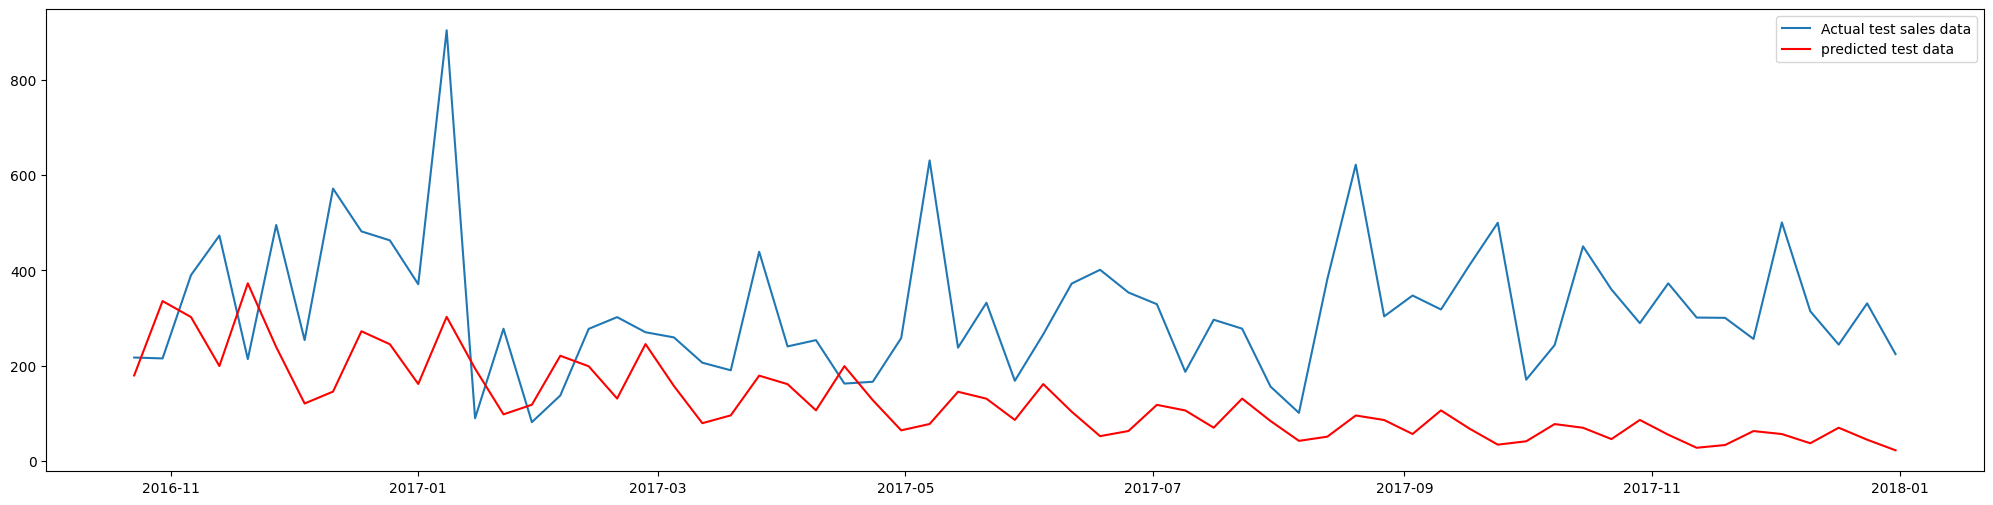

In [88]:
plt.figure(figsize=(25,6))

plt.plot(test.Sales,label='Actual test sales data')
plt.plot(pred_sarima,'r',label='predicted test data')
plt.legend(loc='best')
plt.show()

In [89]:
#Evalution

mse_sarima = mean_squared_error(test.Sales,pred_sarima)
rmse_sarima = mean_squared_error(test.Sales,pred_sarima,squared=False)

print(mse_sarima)
print(rmse_sarima)

61245.18241615192
247.47764023473297


In [90]:
fcast_sarima = model2.predict(len(df2),len(df2)+52,type='levels')
fcast_sarima

2018-01-07    27.323259
2018-01-14    51.060127
2018-01-21    45.966342
2018-01-28    30.328776
2018-02-04    56.726141
2018-02-11    36.387060
2018-02-18    18.374728
2018-02-25    22.166132
2018-03-04    41.422787
2018-03-11    37.290428
2018-03-18    24.604373
2018-03-25    46.019370
2018-04-01    29.519186
2018-04-08    14.906591
2018-04-15    17.982387
2018-04-22    33.604446
2018-04-29    30.252049
2018-05-06    19.960422
2018-05-13    37.333447
2018-05-20    23.947589
2018-05-27    12.093048
2018-06-03    14.588303
2018-06-10    27.261777
2018-06-17    24.542128
2018-06-24    16.192994
2018-07-01    30.286948
2018-07-08    19.427603
2018-07-15     9.810546
2018-07-22    11.834834
2018-07-29    22.116254
2018-08-05    19.909925
2018-08-12    13.136648
2018-08-19    24.570440
2018-08-26    15.760742
2018-09-02     7.958855
2018-09-09     9.601069
2018-09-16    17.941923
2018-09-23    16.152028
2018-09-30    10.657172
2018-10-07    19.932894
2018-10-14    12.785981
2018-10-21     6

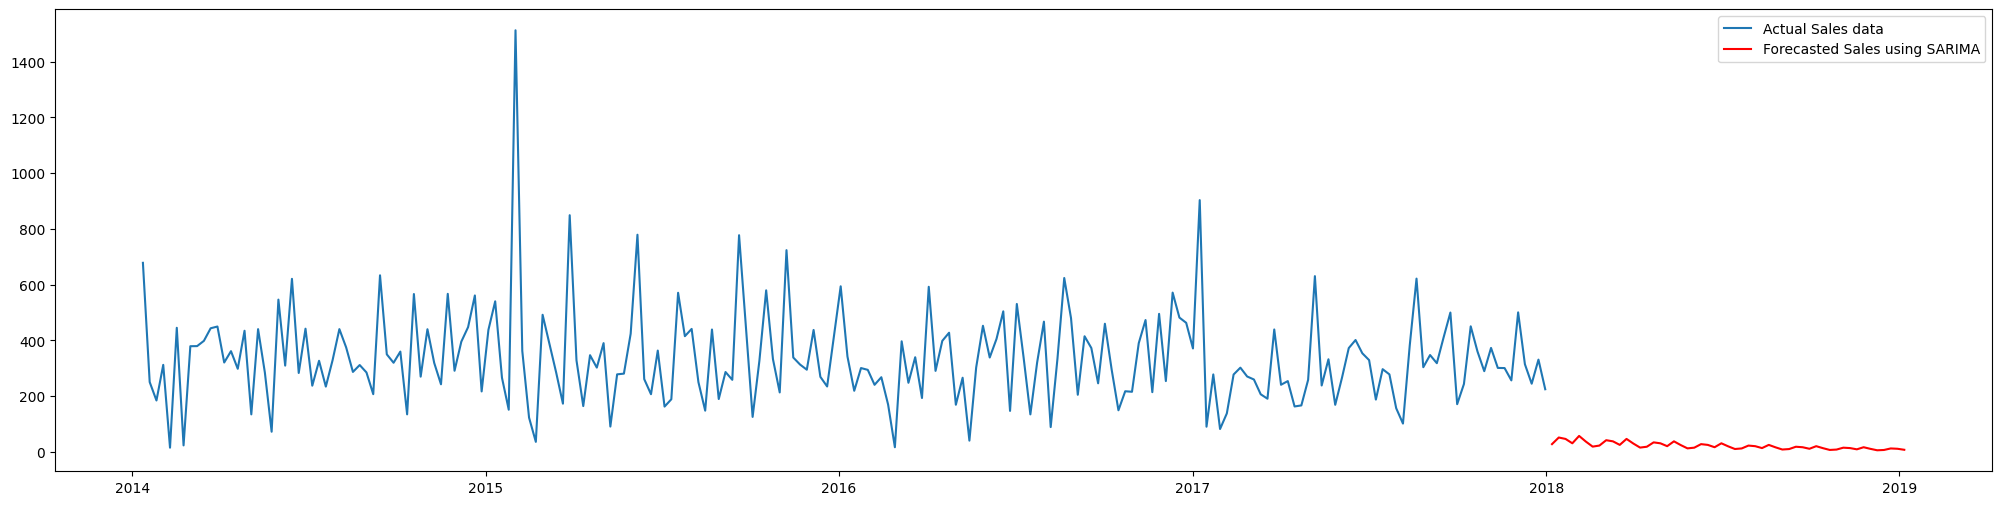

In [91]:
plt.figure(figsize=(25,6))

plt.plot(df2.Sales,label = 'Actual Sales data')
plt.plot(fcast_sarima,'r',label='Forecasted Sales using SARIMA')
plt.legend(loc='best')
plt.show()

## SARIMAX

In [92]:
df6 = df[['Order Date','Sales','Quantity','Profit','Discount']]
df6.shape

(2121, 5)

In [93]:
df6.head()

Order Date      Sales  Quantity    Profit  Discount
0 2016-11-08   261.9600         2   41.9136      0.00
1 2016-11-08   731.9400         3  219.5820      0.00
2 2015-10-11   957.5775         5 -383.0310      0.45
3 2014-06-09    48.8600         7   14.1694      0.00
4 2014-06-09  1706.1840         9   85.3092      0.20

In [94]:
# setting the index as Order Date
df6_1 = df6.set_index('Order Date')
df6_1.head(3)

Sales  Quantity    Profit  Discount
Order Date                                        
2016-11-08  261.9600         2   41.9136      0.00
2016-11-08  731.9400         3  219.5820      0.00
2015-10-11  957.5775         5 -383.0310      0.45

In [95]:
df6_1 = df6_1.resample('W').mean()
df6_1.head()

Sales  Quantity      Profit  Discount
Order Date                                            
2014-01-12  678.107000  3.750000  179.268750  0.150000
2014-01-19  250.094600  4.800000  -50.800880  0.310000
2014-01-26  183.995333  2.888889   39.514033  0.022222
2014-02-02  311.833000  2.500000   -6.615200  0.175000
2014-02-09   14.560000  2.000000    5.532800  0.000000

In [96]:
# hexogeneous variables to forecast 'var'
num1 = int(0.7*len(df6_1))
train1 = df6_1.iloc[:num1]
test1 = df6_1.iloc[num1:]

In [97]:
# train1.head(2)

In [98]:
exog_train = train1[['Quantity','Profit','Discount']]
exog_test = test1[['Quantity','Profit','Discount']]

In [99]:
model3 = SARIMAX(train1.Sales,order=(1,0,0),seasonal_order=(1,0,0,7),exog=exog_train).fit()

In [100]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood                -946.954
Date:                           Fri, 19 May 2023   AIC                           1905.908
Time:                                   10:50:34   BIC                           1923.769
Sample:                               01-12-2014   HQIC                          1913.166
                                    - 10-16-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Quantity      94.0363      6.843     13.742      0.000      80.624     107.449
Profit        -0.3630      0.112     -3.236      0.001      -0.583      -0.143
Discount    -117.0601    159.757     -0.733      0.464    -430.177     196.057
ar.L1         -0.0869      0.104     -0.833      0.405      -0.291       0.118
ar.S.L7        0.1543      0.096      1.603      0.109      -0.034       0.343
sigma2      2.725e+04   2796.036      9.745      0.000    2.18e+04    3.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                89.03
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.90
Prob(H) (two-sided):                  0.63   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model3.resid,lags=[1],return_df=True)['lb_pvalue'].values

if pvalue <0.05:
    print('not good')
else:
    print('good')

good


In [102]:
AIC_SARIMAX = model3.aic
BIC_SARIMAX = model3.bic

In [103]:
#forecasted values for test data
pred_sarimax = model3.forecast(len(test1.Sales),exog = exog_test)
pred_sarimax

2016-10-23    299.438472
2016-10-30    412.918151
2016-11-06    389.353768
2016-11-13    322.043197
2016-11-20    279.343735
                 ...    
2017-12-03    426.384746
2017-12-10    365.268441
2017-12-17    267.132380
2017-12-24    301.021079
2017-12-31    288.703329
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

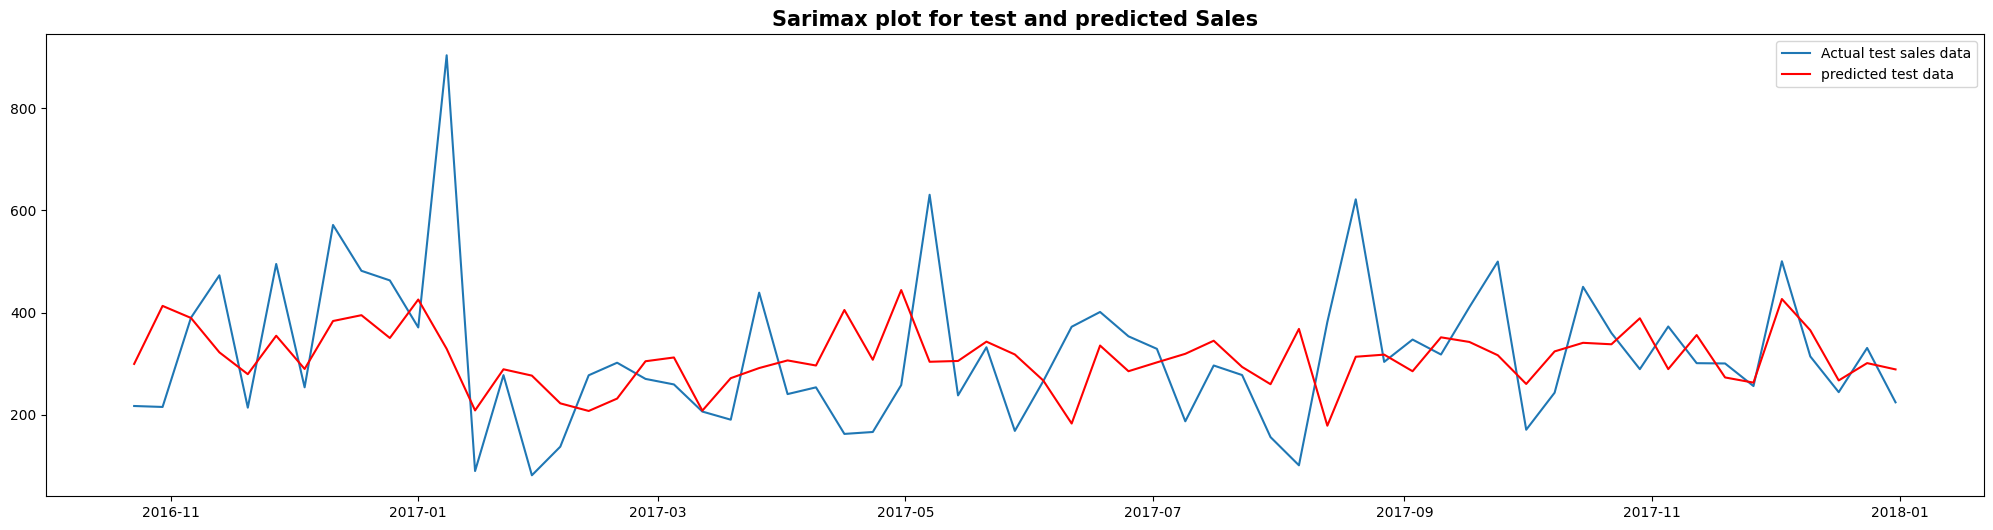

In [104]:
plt.figure(figsize=(25,6))

plt.plot(test1.Sales,label='Actual test sales data')
plt.plot(pred_sarimax,'r',label='predicted test data')
plt.legend(loc='best')
plt.title('Sarimax plot for test and predicted Sales',fontweight='bold',size=15)
plt.show()

In [105]:
#Evalution

mse_sarimax = mean_squared_error(test1.Sales,pred_sarimax)
rmse_sarimax = mean_squared_error(test1.Sales,pred_sarimax,squared=False)

print(mse_sarimax)
print(rmse_sarimax)

19444.59913418319
139.44389242338005


In [106]:
pred_sarimax1 =  model3.predict(len(test1.Sales)+52,exog = len(exog_test)+52)
pred_sarimax1

Order Date
2016-03-27    321.529765
2016-04-03    464.606223
2016-04-10    338.815606
2016-04-17    368.209375
2016-04-24    389.367432
2016-05-01    267.564041
2016-05-08    408.820108
2016-05-15    188.868690
2016-05-22    371.321500
2016-05-29    336.475394
2016-06-05    350.011314
2016-06-12    281.358369
2016-06-19    329.922248
2016-06-26    179.927195
2016-07-03    275.912519
2016-07-10    342.088899
2016-07-17    306.861284
2016-07-24    299.994783
2016-07-31    476.446617
2016-08-07    407.710702
2016-08-14    293.632704
2016-08-21    456.000791
2016-08-28    282.189890
2016-09-04    260.742102
2016-09-11    288.956336
2016-09-18    272.554998
2016-09-25    251.021424
2016-10-02    419.380677
2016-10-09    387.480717
2016-10-16    400.144624
Freq: W-SUN, Name: predicted_mean, dtype: float64

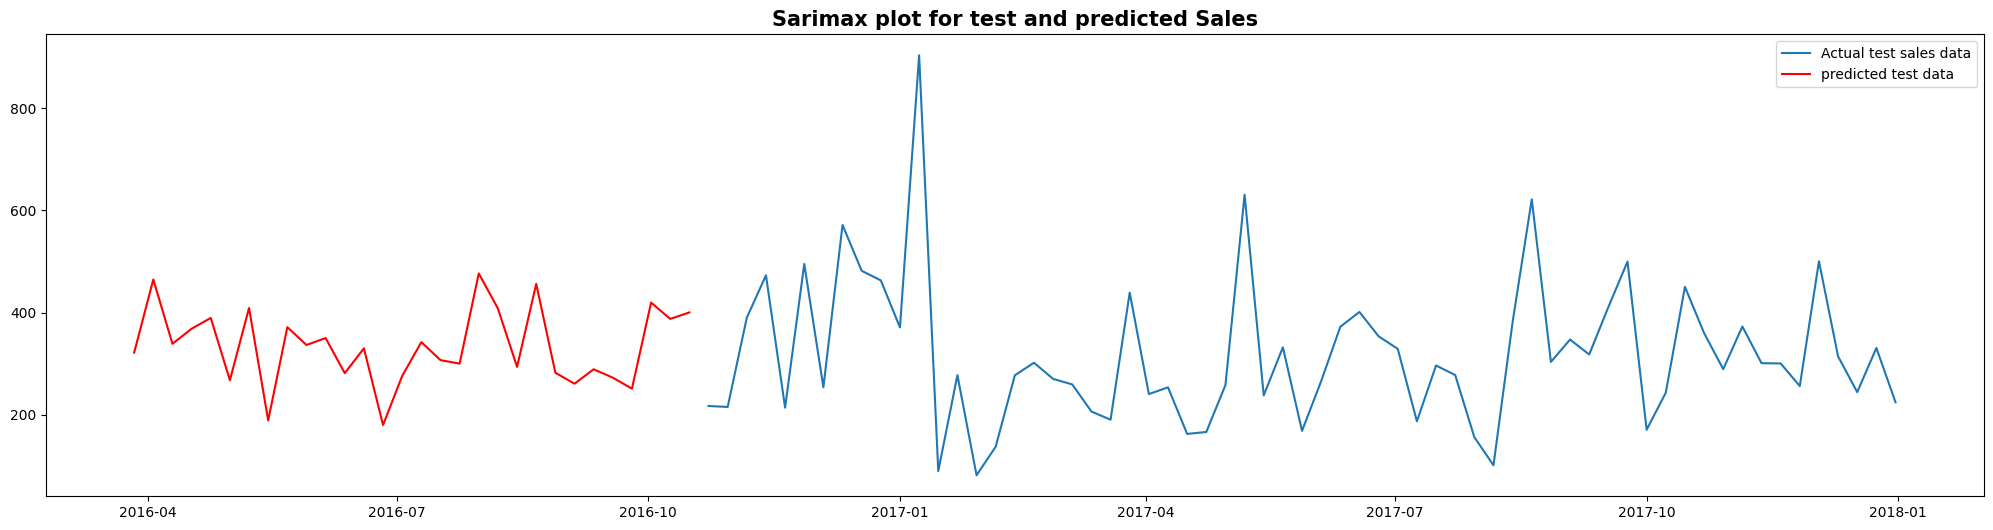

In [107]:
plt.figure(figsize=(25,6))

plt.plot(test1.Sales,label='Actual test sales data')
plt.plot(pred_sarimax1,'r',label='predicted test data')
plt.legend(loc='best')
plt.title('Sarimax plot for test and predicted Sales',fontweight='bold',size=15)
plt.show()

In [108]:
#Forecast  (fv = forecasted values)

sarimax_fv = model3.fittedvalues
sarimax_fv

Order Date
2014-01-12    270.002647
2014-01-19    398.060505
2014-01-26    270.656315
2014-02-02    223.156111
2014-02-09    177.782430
                 ...    
2016-09-18    272.554998
2016-09-25    251.021424
2016-10-02    419.380677
2016-10-09    387.480717
2016-10-16    400.144624
Freq: W-SUN, Length: 145, dtype: float64

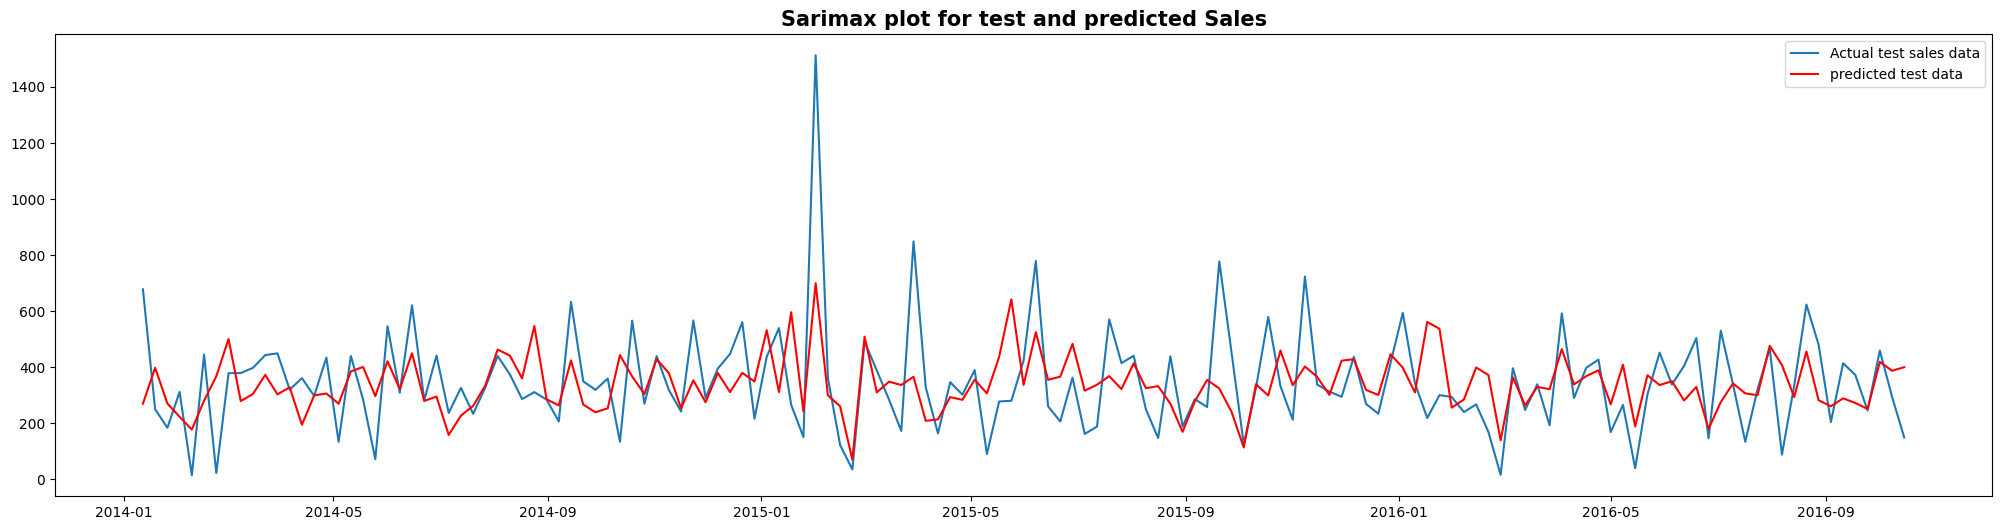

In [109]:
plt.figure(figsize=(25,6))

plt.plot(train1.Sales,label='Actual test sales data')
plt.plot(sarimax_fv,'r',label='predicted test data')
plt.legend(loc='best')
plt.title('Sarimax plot for test and predicted Sales',fontweight='bold',size=15)
plt.show()

## Final plot for all models:-

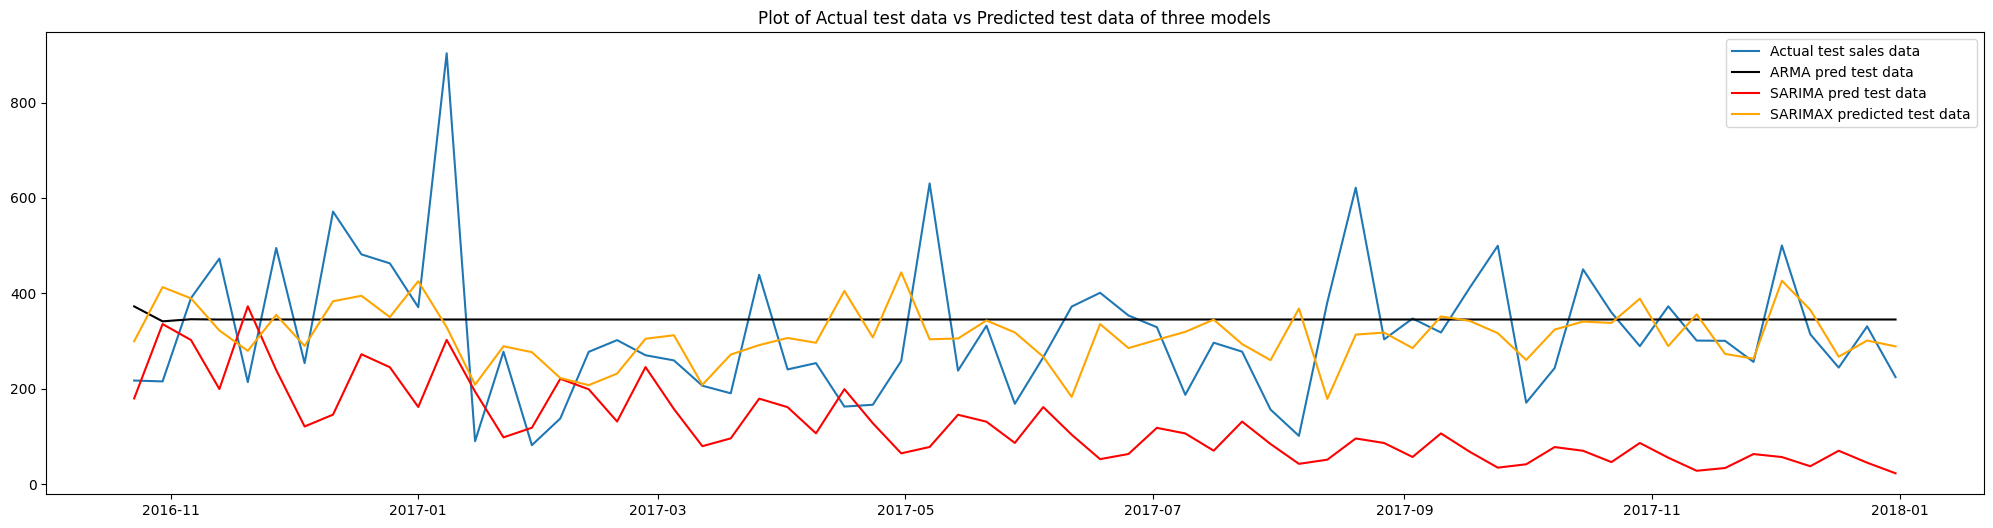

In [110]:
plt.figure(figsize=(25,6))

plt.plot(test.Sales,label='Actual test sales data')
plt.plot(pred_arma,'black',label='ARMA pred test data')
plt.plot(pred_sarima,'r',label='SARIMA pred test data')
plt.plot(pred_sarimax,'orange',label='SARIMAX predicted test data')
plt.title('Plot of Actual test data vs Predicted test data of three models')
plt.legend(loc='best')
plt.show()

In [111]:
v1 = pd.DataFrame({'ARMA':[AIC_ARMA,BIC_ARMA,mse_arma,rmse_arma],'SARIMA':[AIC_SARIMA,BIC_SARIMA,mse_sarima,rmse_sarima],
                  'SARIMAX':[AIC_SARIMAX,BIC_SARIMAX,mse_sarimax,rmse_sarimax]})
v1.index = ['AIC','BIC','MSE','RMSE']
v1

ARMA        SARIMA       SARIMAX
AIC    1927.436320   2006.373182   1905.908331
BIC    1936.366522   2015.303383   1923.768733
MSE   21205.460351  61245.182416  19444.599134
RMSE    145.620948    247.477640    139.443892

## Interpretations:-
       * The best model for predictions is 'SARIMAX' with less AIC,BIC and RMSE values.
       * By Sarimax model the  Predicted values are also nearer to the actual test values.